# Medical Cost Prediction 
## What medical costs should a health insurance company expect from their policy holders?

- Dataset from Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid")
pd.set_option('display.max_rows', 500)

In [202]:
data = pd.read_csv("insurance.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1. Exploratory Data Analysis
6 possible predictors and 1 target variable

### 1.1 Metric Variables
- <b>charges</b> (float, continuous) = target variable
- <b>children</b> (int, discrete)
    - number of children / dependents coverd by the insurance plan
- <b>bmi </b>(float, continuous)
    - body mass index = weight(kg) / (height (mtr))^2
    - ideal bmi: 18.5 - 24.9
- <b>age</b> (int, continuous)


In [203]:
metric_vars = data[["age", "bmi", "children", "charges"]]

In [204]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#### Scatter Matrix
- diagonal: univariate distributions
- off-diagonal: bivariate distributions

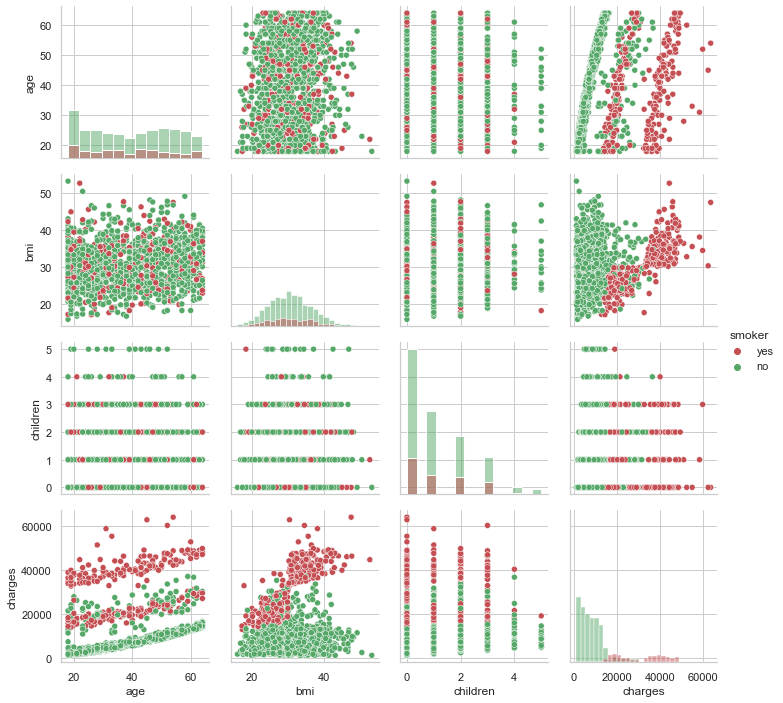

In [205]:
g = sns.PairGrid(data, hue="smoker", palette=["C3", "C2"])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

#### Correlation Matrix 
- absolute pearson correlation coefficent

<AxesSubplot:>

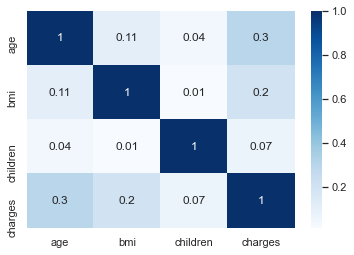

In [206]:
corr = metric_vars.corr().round(decimals = 2).abs()
sns.heatmap(corr, cmap="Blues", robust=True, annot = True)

#### Charges
- 50% of people cause medical costs between 4740.29\\$ and 16639.91\\$
- only 10% have costs over 34831.72\\$
- high positive skew (lef-leaning, right-skewed)

In [207]:
print("Median:\t\t", np.percentile(data["charges"], 50))
print("90%-quantile:\t", np.percentile(data["charges"], 90))

Median:		 9382.033
90%-quantile:	 34831.7197


<AxesSubplot:ylabel='charges'>

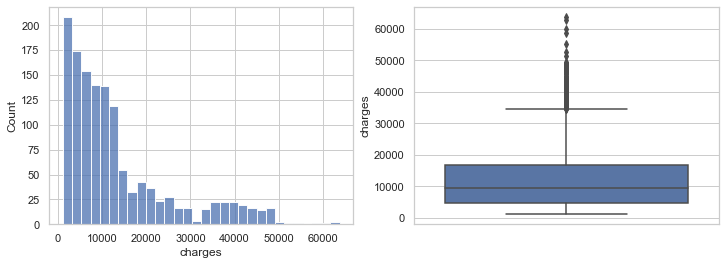

In [208]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x=data["charges"], ax=ax[0])
sns.boxplot(y=data["charges"], ax=ax[1])

#### Children
- the number of children doesn't seem too tell a lot about the medical charges

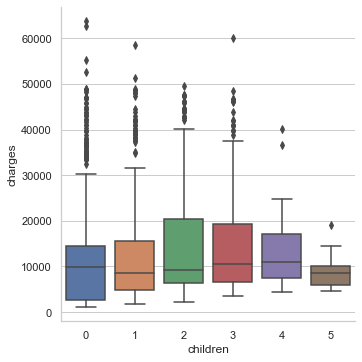

In [209]:
sns.catplot(x="children", y="charges", kind="box", data=data)

#### BMI
- the bmi alone is only weakly correlated with the medical costs: $r=+0.2$
- For smokers, however, a higher bmi clearly coincides with higher medical costs

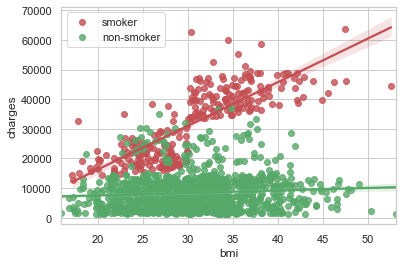

In [210]:
sns.regplot(x=data["bmi"][data["smoker"] == "yes"], y=data["charges"][data["smoker"] == "yes"], color="C3", label="smoker")
sns.regplot(x=data["bmi"][data["smoker"] == "no"], y=data["charges"][data["smoker"] == "no"], color="C2", label="non-smoker")
plt.legend()

#### Age
- only people from 18 to 64 years old --> no retired persons captured, working age population
- overproportionally more data of young people (age 18-22) captured


- older people clearly seem to produce higher medical costs
- there can be identified <b>3 clusters</b>:
    - <b>cluster 2:</b> smokers, high medical costs
    - <b>cluster 1:</b> smokers & non-smokers, medium medical costs
    - <b>cluster 0:</b> non-smokers, low medical costs

<AxesSubplot:xlabel='age', ylabel='charges'>

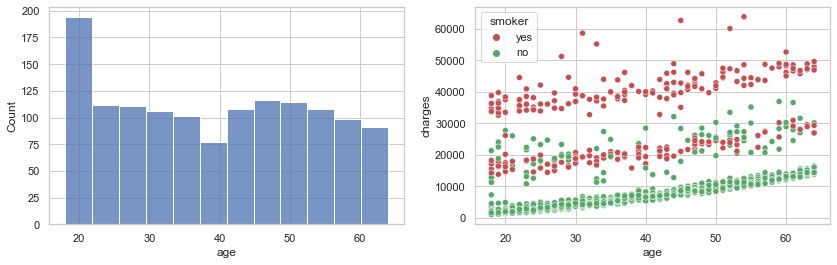

In [211]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(x=data["age"], ax=ax[0])
sns.scatterplot(x="age", y="charges", hue="smoker",  data=data, palette=["C3", "C2"], ax=ax[1])

### 1.2 Categorical Variables
- <b>Smoker:</b> "Yes" or "No" ----> binary
- <b>Region:</b> "southwest", "southeast", "nortwest" or "northeast"
    - the beneficiary's place of residence in the U.S, divided into 4 geographical regions
- <b>Sex:</b> "Male" or "Female" ----> binary

#### Smoker
- Smoking clearly coincides with much higher medical charges

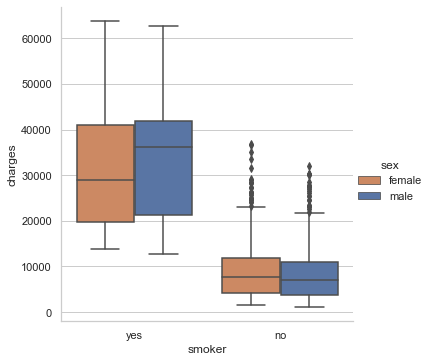

In [212]:
sns.catplot(x="smoker", y="charges", kind="box", hue="sex",  data=data, palette=["C1", "C0"])

#### Region
- there seem to be no significant differences between charges in the different regions

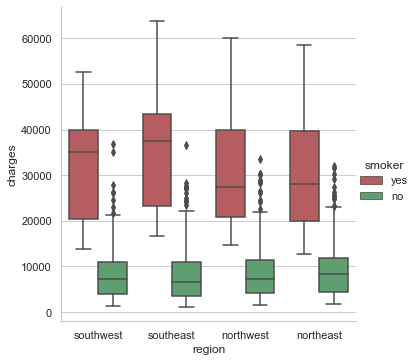

In [213]:
sns.catplot(x="region", y="charges", kind="box", hue="smoker", data=data, palette=["C3", "C2"])

#### Sex

- The data set is balanced in terms of gender
- There are <b>~6%</b> more men smoking than women

Male 50.52% | Female 49.48%

159 of 676 (23.52%) men smoke.
115 of 662 (17.37%) women smoke.


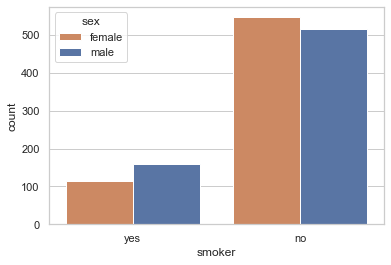

In [214]:
sns.countplot(x="smoker", data=data, hue="sex", palette=["C1", "C0"])
males = data[data.sex == "male"].shape[0]
females = data[data.sex == "female"].shape[0]

male_smokers = data[(data.sex == "male") & (data.smoker == "yes")].shape[0]
female_smokers = data[(data.sex == "female") & (data.smoker == "yes")].shape[0]

print("Male {:.2f}% | Female {:.2f}%".format(100*males/(males+females), 100*females/(males+females)))
print("\n{} of {} ({:.2f}%) men smoke.".format(male_smokers, males, 100*male_smokers/males))
print("{} of {} ({:.2f}%) women smoke.".format(female_smokers, females, 100*female_smokers/females))

- Men tend to cause slightly higher medical charges (same median, but higher mean)

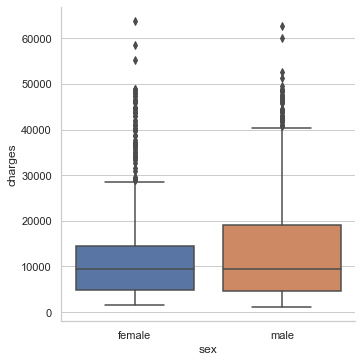

In [215]:
sns.catplot(x="sex", y="charges", kind="box", data=data)

## 2. Data Preprocessing 

### 2.1 Clustering the data into three medical cost groups

[1 0 0 ... 0 0 1]


Text(0, 0.5, 'charges')

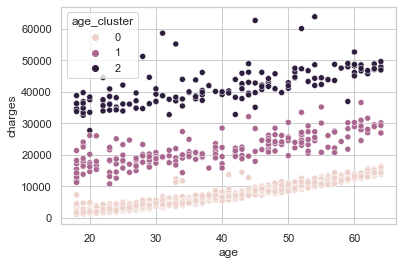

In [216]:
from sklearn.cluster import KMeans
data['charges/age'] = data['charges'] - data['age']*260

X = np.array(data["charges/age"]).reshape(-1, 1)
kmeans = KMeans(n_clusters=3, init=np.array([8000, 20000, 40000]).reshape(-1, 1), n_init=1, random_state=0).fit(X)

print(kmeans.labels_)
data["age_cluster"] = kmeans.labels_
sns.scatterplot(x=data["age"], y=data["charges"], hue=data["age_cluster"])
plt.ylabel("charges")

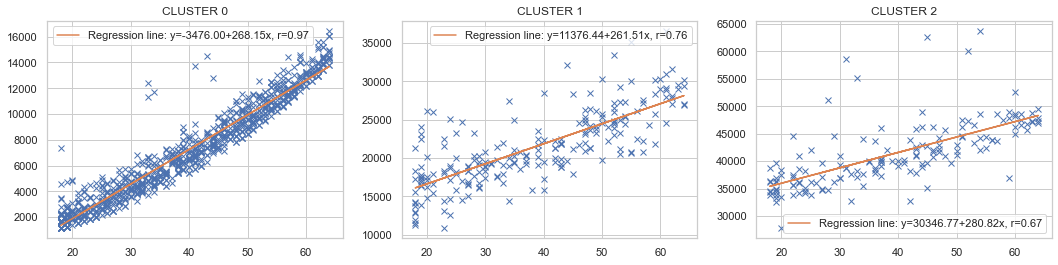

In [217]:
import scipy
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

x = data["age"][data["age_cluster"] == 0]
y = data["charges"][data["age_cluster"] == 0]

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
#line
ax[0].set_title("CLUSTER 0")
ax[0].plot(x, y, linewidth=0, marker='x')
ax[0].plot(x, intercept + slope * x, label=line)
ax[0].legend(facecolor='white')

x = data["age"][data["age_cluster"] == 1]
y = data["charges"][data["age_cluster"] == 1]
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
#line
ax[1].set_title("CLUSTER 1")
ax[1].plot(x, y, linewidth=0, marker='x')
ax[1].plot(x, intercept + slope * x, label=line)
ax[1].legend(facecolor='white')

x = data["age"][data["age_cluster"] == 2]
y = data["charges"][data["age_cluster"] == 2]
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
#line
ax[2].set_title("CLUSTER 2")
ax[2].plot(x, y, linewidth=0, marker='x')
ax[2].plot(x, intercept + slope * x, label=line)

ax[2].legend(facecolor='white')
plt.show()
# sns.regplot(x=X, y=y)

### 2.2 Dummy Variables
- introducing dummy variables for sex, smoker, region: <b>!AVOIDING DUMMY TRAP!</b>
    - sex --> sex_male
    - smoker --> smoker_yes
    - region --> region_northeast, region_southeast, region_south_west

In [218]:
# data = data.drop(["sex_female", "smoker_no", "region_northwest"], axis=1)
data[["age_cluster_0", "age_cluster_1", "age_cluster_2"]] = pd.get_dummies(data["age_cluster"], drop_first=False).copy()
# data = data.drop(["age_cluster"], axis=1)

data = pd.get_dummies(data)
data = data.drop(["sex_female", "smoker_no", "region_northwest"], axis=1)
data.head()

,age,bmi,children,charges,charges/age,age_cluster,age_cluster_0,age_cluster_1,age_cluster_2,sex_male,smoker_yes,region_northeast,region_southeast,region_southwest
0,19,27.900,0,16884.92400,11944.92400,1,0,1,0,0,1,0,0,1
1,18,33.770,1,1725.55230,-2954.44770,0,1,0,0,1,0,0,1,0
2,28,33.000,3,4449.46200,-2830.53800,0,1,0,0,1,0,0,1,0
3,33,22.705,0,21984.47061,13404.47061,1,0,1,0,1,0,0,0,0
4,32,28.880,0,3866.85520,-4453.14480,0,1,0,0,1,0,0,0,0


### 2.3 Interaction Terms
- bmi*smoker
- bmi\*cluster0, bmi\*cluster1, bmi\*cluster2

- age\*cluster0, age\*cluster1, age\*cluster2

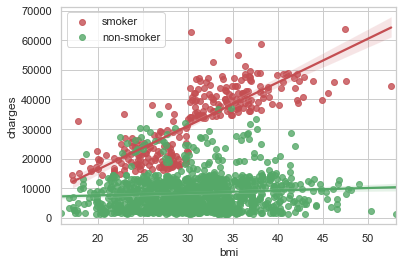

In [219]:
sns.regplot(x=data["bmi"][data["smoker_yes"] == 1], y=data["charges"][data["smoker_yes"] == 1], color="C3", label="smoker")
sns.regplot(x=data["bmi"][data["smoker_yes"] == 0], y=data["charges"][data["smoker_yes"] == 0], color="C2", label="non-smoker")
plt.legend()

In [220]:
# poly = PolynomialFeatures(interaction_only=True,include_bias = True)
data["smoker*bmi"] = data["smoker_yes"]*data["bmi"]
data["bmi*age0"] = data["age_cluster_0"]*data["bmi"]
data["bmi*age1"] = data["age_cluster_1"]*data["bmi"]
data["bmi*age2"] = data["age_cluster_2"]*data["bmi"]
data["age2"] = data["age"]**2

data["age0"] = data["age_cluster_0"]*data["age"]
data["age1"] = data["age_cluster_1"]*data["age"]
data["age2"] = data["age_cluster_2"]*data["age"]
data["age0*smoker_no"] = data["age_cluster_0"]*data["age"]*(1-data["smoker_yes"])
data["age2*smoker_yes"] = data["age_cluster_2"]*data["age"]*data["smoker_yes"]

data.info()
# data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   charges/age       1338 non-null   float64
 5   age_cluster       1338 non-null   int32  
 6   age_cluster_0     1338 non-null   uint8  
 7   age_cluster_1     1338 non-null   uint8  
 8   age_cluster_2     1338 non-null   uint8  
 9   sex_male          1338 non-null   uint8  
 10  smoker_yes        1338 non-null   uint8  
 11  region_northeast  1338 non-null   uint8  
 12  region_southeast  1338 non-null   uint8  
 13  region_southwest  1338 non-null   uint8  
 14  smoker*bmi        1338 non-null   float64
 15  bmi*age0          1338 non-null   float64
 16  bmi*age1          1338 non-null   float64


In [221]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(interaction_only=False)
# data = poly.fit_transform(data)

# print(data.shape)

### 2.4 Split Dataset into Training and Test Set 
- training dataset split again into (real) training set and validation set for the purpose of model validation/hyperparameter selection in CV

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_train, data_test = train_test_split(data, test_size=0.3, random_state=24, stratify=data["age_cluster"]).copy()
data_train = data_train.sort_index().copy()
data_test = data_test.sort_index().copy()

from collections import Counter
print(Counter(data_train["age_cluster"]))
print(Counter(data_test["age_cluster"]))

Counter({0: 680, 1: 150, 2: 106})
Counter({0: 292, 1: 64, 2: 46})


### 2.5 Standardizing all Numerical Predictor Variables 

In [223]:
scaler = StandardScaler()
data_train = data_train.copy()
data_train[["age", "bmi", "children", "smoker*bmi", "bmi*age0", "bmi*age1", "bmi*age2", "age0", "age1", "age2", "age0*smoker_no", "age2*smoker_yes"]] = scaler.fit_transform(data_train[["age", "bmi", "children", "smoker*bmi", "bmi*age0", "bmi*age1", "bmi*age2", "age0", "age1", "age2", "age0*smoker_no", "age2*smoker_yes"]])
    
# scale test data with scaler trained on traning data --> no information leakage
data_test = data_test.copy()
data_test[["age", "bmi", "children", "smoker*bmi", "bmi*age0", "bmi*age1", "bmi*age2", "age0", "age1", "age2", "age0*smoker_no", "age2*smoker_yes"]] = scaler.transform(data_test[["age", "bmi", "children", "smoker*bmi", "bmi*age0", "bmi*age1", "bmi*age2", "age0", "age1", "age2", "age0*smoker_no", "age2*smoker_yes"]])

data_train.head()

,age,bmi,children,charges,charges/age,age_cluster,age_cluster_0,age_cluster_1,age_cluster_2,sex_male,...,region_southwest,smoker*bmi,bmi*age0,bmi*age1,bmi*age2,age2,age0,age1,age0*smoker_no,age2*smoker_yes
0,-1.424944,-0.449654,-0.904391,16884.9240,11944.9240,1,0,1,0,0,...,1,1.683996,-1.525072,2.283565,-0.353945,-0.333614,-1.345294,0.847148,-1.345294,-0.331874
1,-1.496459,0.526350,-0.103530,1725.5523,-2954.4477,0,1,0,0,1,...,0,-0.501836,0.792094,-0.429204,-0.353945,-0.333614,-0.491924,-0.405924,-0.491924,-0.331874
4,-0.495254,-0.286710,-0.904391,3866.8552,-4453.1448,0,1,0,0,1,...,0,-0.501836,0.456561,-0.429204,-0.353945,-0.333614,0.171809,-0.405924,0.171809,-0.331874
5,-0.566769,-0.808797,-0.904391,3756.6216,-4303.3784,0,1,0,0,0,...,0,-0.501836,0.241106,-0.429204,-0.353945,-0.333614,0.124399,-0.405924,0.124399,-0.331874
7,-0.137681,-0.476257,1.498191,7281.5056,-2338.4944,0,1,0,0,0,...,0,-0.501836,0.378339,-0.429204,-0.353945,-0.333614,0.408856,-0.405924,0.408856,-0.331874


### 2.6 Correlation Matrix

<AxesSubplot:>

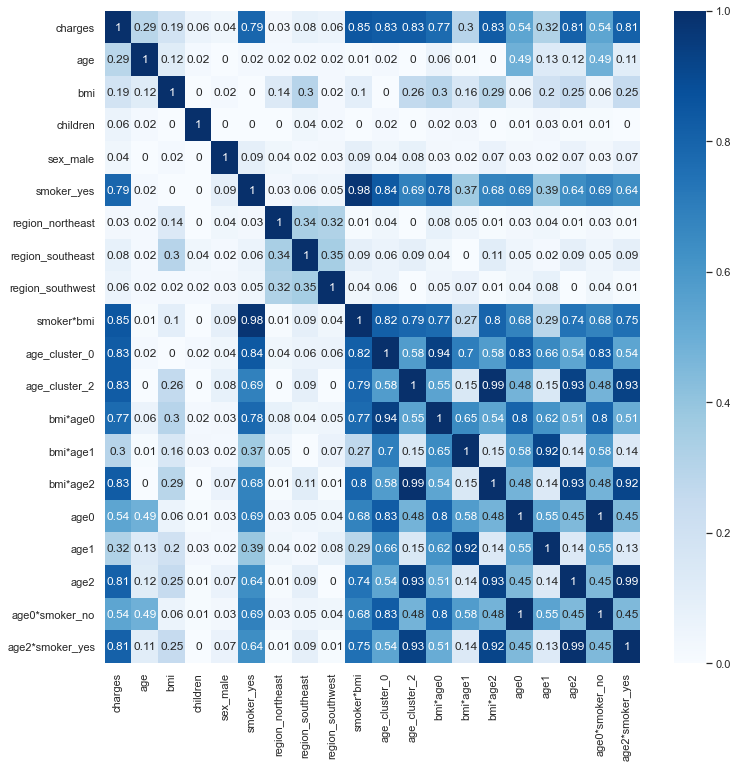

In [224]:
plt.figure(figsize=(12,12))
metric_vars = data_train[["charges", "age", "bmi", "children", "sex_male", "smoker_yes", "region_northeast", "region_southeast", "region_southwest", 
    "smoker*bmi", "age_cluster_0", "age_cluster_2", "bmi*age0", "bmi*age1", "bmi*age2", "age0", "age1", "age2", 
    "age0*smoker_no", "age2*smoker_yes"]]
corr = metric_vars.corr().round(decimals = 2).abs()
sns.heatmap(corr, cmap="Blues", robust=True, annot = True)

### 2.7 Define Variables for Classification and Regression

In [225]:
class_X = [
    "age", "bmi", "children", "sex_male", "smoker_yes", "region_northeast", "region_southeast",
    "region_southwest", "smoker*bmi"
]
class_X = [
    "age", "bmi", "children", "sex_male", "smoker_yes"
]

reg_X = [
    "age", "bmi", "children", "sex_male", "smoker_yes", "region_northeast", "region_southeast", "region_southwest", 
    "smoker*bmi", "age_cluster_0", "age_cluster_2", "bmi*age0", "bmi*age1", "bmi*age2", "age0", "age1", "age2", 
    "age0*smoker_no", "age2*smoker_yes"
]

class_y = ["age_cluster"]
reg_y = ["charges"]

# class_X = {}

reg_X = {}

In [226]:
training_results = {}
single_training_results = {}

### 2.8 Baseline Regression Model

In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

linReg = LinearRegression()
X_train = data_train[["age", "children", "bmi", "smoker_yes", "region_northeast", "region_southeast", "region_southwest"]]
y_train = data_train[["charges"]]
linReg.fit(X_train, y_train)
print("######### Baseline Model Training #########")
print("R-squared:\t", linReg.score(X_train, y_train))
print("intercept:\t", linReg.intercept_)
print("coefficients:\t", linReg.coef_)

# Baseline Prediction
X_test = data_test[["age", "children", "bmi", "smoker_yes", "region_northeast", "region_southeast", "region_southwest"]]
y_test = data_test[["charges"]]

y_pred = linReg.predict(X_test)

# Calculate regression metrics        
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n######### Baseline Model Test #########")
print("R-squared:\t", r2)
print("RMSE:\t", rmse)
print("MAE:\t", mae)

######### Baseline Model Training #########
R-squared:	 0.7489852211199308
intercept:	 [8272.18507222]
coefficients:	 [[ 3550.6070567    715.63126578  2052.80736344 23836.17306996
    816.96079161  -510.4643883   -270.90536007]]

######### Baseline Model Test #########
R-squared:	 0.7544318452656915
RMSE:	 5888.9098571164195
MAE:	 4127.799435577642


## Model Training
### Idea: Use Cluster Information to achieve more precise medical cost predictions    
    3. Model Training: Classification
    4. Model Training: Sequential Regression Models (using Cluster Information)
### Then check how models without cluster information perform
    5. Model Training: Single Regression Models (no Cluster Information)

## 3. Model Training: Classification
    3.1 Support Vector Classifier
    3.2 Random Forest Classifier
    3.3 Gradient Boosting Classifier

In [228]:
# specify training data
X_train = data_train[class_X]
y_train = np.array(data_train[class_y]).reshape(-1, 1).flatten()

# Create List to save trained classification models
classification_models = []

### 3.1 Support Vector Machine

<u>Hyperparameters</u>:
- **C**: Regularization parameter where the strength of the regularization is inversely proportional to C. It controls the impact of misclassification on the training process. Intuitively it specifies how many training points are allowed to be misclassified (soft margin vs. hard margin).


- **kernel**: Specifies the kernel type to be used in the algorithm:
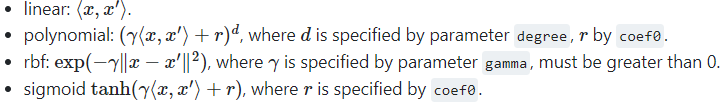


- **gamma**: Gamma controls the smoothness and the extent of curvature on our decision boundary. A large value of gamma of is problematic with regard to overfitting because the class regions get too specific. A lower gamma value often results in a more generalized model because the decision boundary gets smoother. 

In [229]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Set up steps for pipeline
steps = [
    ("SVC", SVC(class_weight="balanced", decision_function_shape='ovo'))
        ]
pipeline = Pipeline(steps)

# Specify possible hyperparameters 
parameters = {'SVC__C': np.logspace(-1, 3, 5),
              'SVC__gamma': np.logspace(-3, 1, 5),
# #               "SVC__kernel": ["linear", "poly", "sigmoid"]
              "SVC__kernel": ["rbf"]
             }
# parameters = {'SVC__C': [1000],
#               'SVC__gamma': [0.01],
#               "SVC__kernel": ["rbf"]
#               }

# Define scoring metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
scoring = {'Accuracy': make_scorer(accuracy_score), "F1": "f1_micro"}

# Instantiate GridSearchCV object
stratKFold = StratifiedKFold(n_splits=5, random_state=99, shuffle = True)
gs_cv = GridSearchCV(pipeline, parameters, refit = "Accuracy", cv=stratKFold, scoring=scoring, verbose=0)

# # Oversampling the training dataset only
# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train)

# Fit to training set
gs_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=99, shuffle=True),
             estimator=Pipeline(steps=[('SVC',
                                        SVC(class_weight='balanced',
                                            decision_function_shape='ovo'))]),
             param_grid={'SVC__C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'SVC__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                         'SVC__kernel': ['rbf']},
             refit='Accuracy',
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'F1': 'f1_micro'})

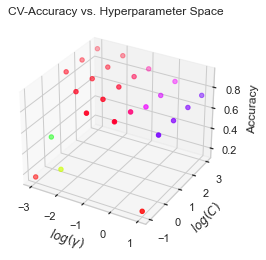

In [230]:
# print(gs_cv.cv_results_["params"])

# Accuracy Scores
accuracy_cv = gs_cv.cv_results_["split0_test_Accuracy"]+gs_cv.cv_results_["split1_test_Accuracy"]+gs_cv.cv_results_["split2_test_Accuracy"]+gs_cv.cv_results_["split3_test_Accuracy"]+gs_cv.cv_results_["split4_test_Accuracy"]
accuracy_cv = accuracy_cv/5

# F1-Scores
f1_cv = gs_cv.cv_results_["split0_test_F1"]+gs_cv.cv_results_["split1_test_F1"]+gs_cv.cv_results_["split2_test_F1"]+gs_cv.cv_results_["split3_test_F1"]+gs_cv.cv_results_["split4_test_F1"]
f1_cv = f1_cv/5

svc__gamma = []
svc__C = []
for i in gs_cv.cv_results_["params"]:
    svc__gamma.append(i["SVC__gamma"])
    svc__C.append(i["SVC__C"])
    
# print(svc__C)
# Plot CV_Results
# plt.scatter(gs_cv.cv_results_["params"][np.arange(0, accuracy_cv.shape[0])]["SVC__C"], accuracy_cv)
# plt.scatter(svc__gamma, f1_cv)

# plot hyyperparameters vs. accuracy in 3D
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

import math
plt.title("CV-Accuracy vs. Hyperparameter Space")

z_line = accuracy_cv
x_line = np.log(svc__gamma) / np.log(10)
y_line = np.log(svc__C) / np.log(10)
# ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = z_line
x_points = x_line
y_points = y_line
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
ax.set_xlabel("$log(\gamma)$")
ax.set_ylabel("$log(C)$")
ax.set_zlabel("Accuracy")

plt.show()

In [231]:
print("Best CV Score (Accuracy): {}".format(gs_cv.best_score_))
print("Tuned Model Parameters: {}".format(gs_cv.best_params_))

# from sklearn.model_selection import cross_val_score
# all_scores = cross_val_score(estimator=gs_cv, X=X_train, y=y_train, cv=5)
# print(all_scores)

Best CV Score (Accuracy): 0.9273466833541928
Tuned Model Parameters: {'SVC__C': 10.0, 'SVC__gamma': 0.01, 'SVC__kernel': 'rbf'}


In [232]:
# Save SVM with optimized hyperparameters
import pickle
classification_models.append("svm")
pickle.dump(gs_cv, open("models/svm.sav", "wb"))

### 3.2 Random Forest Classifier

<u>Hyperparameters</u>:
- **max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


- **max_features**: The number of features to consider when looking for the best split:


- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.


- **min_samples_split**: The minimum number of samples required to split an internal node.


- **n_estimators**: The number of trees in the forest.


In [233]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Specify possible hyperparameters 
# parameters = {
#     'max_depth': [10, 50, 100],
#     'max_features': ['log2', 'sqrt'],
#     'min_samples_leaf': [1, 2, 4],
#     'min_samples_split': [2, 5, 10],
#     'n_estimators': np.insert(np.arange(100, 1000, 100), 0, 10)
# }
parameters = {
    'max_depth': [10],
    'max_features': ['log2'],
    'min_samples_leaf': [2],
    'min_samples_split': [2],
    'n_estimators': [250]
}

# Define scoring metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
scoring = {'Accuracy': make_scorer(accuracy_score), "F1": "f1_macro"}

# Instantiate GridSearchCV object
gs_cv = GridSearchCV(RandomForestClassifier(), parameters, scoring=scoring, refit="Accuracy", verbose=42, n_jobs=-1)

# Fit to training set
gs_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': ['log2'],
                         'min_samples_leaf': [2], 'min_samples_split': [2],
                         'n_estimators': [250]},
             refit='Accuracy',
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'F1': 'f1_macro'},
             verbose=42)

In [234]:
print("Best CV Score (Accuracy): {}".format(gs_cv.best_score_))
print("Tuned Model Parameters: {}".format(gs_cv.best_params_))
print("\nFEATURE IMPORTANCES:\n")
for c in range(0, X_train.columns.shape[0]):
    print("{}: \t{:.2f}".format(X_train.columns[c], gs_cv.best_estimator_.feature_importances_[c]))

# from sklearn.model_selection import cross_val_score
# all_scores = cross_val_score(estimator=gs_cv, X=X_train, y=y_train, cv=5)
# print(all_scores)

Best CV Score (Accuracy): 0.9294743429286608
Tuned Model Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}

FEATURE IMPORTANCES:

age: 	0.08
bmi: 	0.25
children: 	0.02
sex_male: 	0.01
smoker_yes: 	0.63


In [235]:
# Save model with optimized hyperparameters
import pickle
classification_models.append("rand_forest_class")
pickle.dump(gs_cv, open("models/rand_forest_class.sav", "wb"))

### 3.3 Gradient Tree Boosting Classifier

<u>Hyperparameters</u>:
- **learning_rate**: Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.


- **subsample**: The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.


- **n_estimators**: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.



In [236]:
from sklearn.ensemble import GradientBoostingClassifier

# Specify possible hyperparameters 
parameters = {
#     "loss":["deviance"],
    "learning_rate": [0.0025, 0.005, 0.0075],
#     "min_samples_split": np.linspace(0.1, 0.5, 12),
#     "min_samples_leaf": np.linspace(0.1, 0.5, 12),
#     "max_depth":[3,7,9],
#     "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.65, 0.7, 0.75],
    "n_estimators":[120, 125, 130]
    }
parameters = {
        "learning_rate": [0.005],
        "subsample": [0.75],
        "n_estimators": [120]
     }

# Define scoring metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
scoring = {'Accuracy': make_scorer(accuracy_score), "F1": "f1_macro"}

# Instantiate GridSearchCV object
gs_cv = GridSearchCV(GradientBoostingClassifier(), parameters, scoring=scoring, refit="Accuracy", verbose=42, n_jobs=-1)

# Fit to training set
gs_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.005], 'n_estimators': [120],
                         'subsample': [0.75]},
             refit='Accuracy',
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'F1': 'f1_macro'},
             verbose=42)

In [237]:
print("Best CV Score (Accuracy): {}".format(gs_cv.best_score_))
print("Tuned Model Parameters: {}".format(gs_cv.best_params_))

print("\nFEATURE IMPORTANCES:\n")
for c in range(0, X_train.columns.shape[0]):
    print("{}: \t{:.2f}".format(X_train.columns[c], gs_cv.best_estimator_.feature_importances_[c]))


# from sklearn.model_selection import cross_val_score
# all_scores = cross_val_score(estimator=gs_cv, X=X_train, y=y_train, cv=5)
# print(all_scores)

Best CV Score (Accuracy): 0.9284048242120833
Tuned Model Parameters: {'learning_rate': 0.005, 'n_estimators': 120, 'subsample': 0.75}

FEATURE IMPORTANCES:

age: 	0.00
bmi: 	0.34
children: 	0.00
sex_male: 	0.00
smoker_yes: 	0.65


In [238]:
# Save SVM with optimized hyperparameters
import pickle
classification_models.append("grad_boost_class")
pickle.dump(gs_cv, open("models/grad_boost_class.sav", "wb"))

## 4. Model Training: Sequential Regression Models (using Cluster Information)
    4.1 Ridge Regression
    4.2 Clustered Ridge Regression
    4.3 LASSO Regression
    4.4 OLS Regression
    4.5 Random Forest Regressor
    4.6 Gradient Boosting Regressor
    4.7 Neural Network

In [239]:
# Create List to save trained regression models
regression_models = []
single_regression_models = []

#### Preparing Training Set: Train Reg. Models on Predicted Clusters from Classification

In [240]:
 # specify train data for classification
X_train = data_train[class_X].copy()
y_train = np.array(data_train[class_y]).reshape(-1, 1).flatten()

cm = "svm"

print(cm)
class_model = pickle.load(open("models/"+cm+".sav", "rb"))
print(class_model)

# add classification result to train data
y_pred = class_model.predict(X_train[class_X])

data_train_reg = data_train.copy()
data_train_reg["pred_age_cluster"] = y_pred.copy()
data_train_reg["age_cluster"] = y_pred.copy()

#     print("\ny_pred added")
#     print(data_train_reg.info())
#     print(data_train_reg["age_cluster"])
#     sns.scatterplot(x = data_train_reg["age"], y=data_train_reg["charges"], hue=data_train_reg["pred_age_cluster"])


# replace real age_cluster with predicted age cluster from classification
#     df = pd.DataFrame()
#     df[["age_cluster_0", "age_cluster_1", "age_cluster_2"]] = pd.get_dummies(data_train["pred_age_cluster"].copy(), drop_first=False)
#     print(df.info())
data_train_reg[["age_cluster_0", "age_cluster_1", "age_cluster_2"]] = pd.get_dummies(data_train_reg["pred_age_cluster"].copy(), drop_first=False)
#     print("\nage cluster dummies added")
#     print(data_train.info())

data_train_reg["bmi*age0"] = data_train_reg["age_cluster_0"].copy()*data_train_reg["bmi"].copy()
data_train_reg["bmi*age1"] = data_train_reg.loc[:,"age_cluster_1"]*data_train_reg["bmi"]
data_train_reg["bmi*age2"] = data_train_reg.loc[:,"age_cluster_2"]*data_train_reg["bmi"]

data_train_reg["age0"] = data_train_reg["age_cluster_0"]*data_train_reg["age"]
data_train_reg["age1"] = data_train_reg["age_cluster_1"]*data_train_reg["age"]
data_train_reg["age2"] = data_train_reg["age_cluster_2"]*data_train_reg["age"]
data_train_reg["age0*smoker_no"] = data_train_reg["age_cluster_0"]*data_train_reg["age"]*(1-data_train_reg["smoker_yes"])
data_train_reg["age2*smoker_yes"] = data_train_reg["age_cluster_2"]*data_train_reg["age"]*data_train_reg["smoker_yes"]

svm
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=99, shuffle=True),
             estimator=Pipeline(steps=[('SVC',
                                        SVC(class_weight='balanced',
                                            decision_function_shape='ovo'))]),
             param_grid={'SVC__C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'SVC__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                         'SVC__kernel': ['rbf']},
             refit='Accuracy',
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'F1': 'f1_micro'})


### 4.1 Ridge-Regression with Interaction Terms 
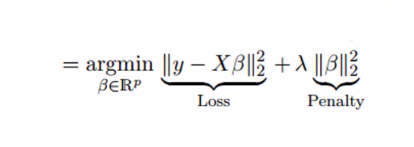
<img src="L1_and_L2_balls.svg.png" width=500 height=500 />
<img src="lasso mse.png" width=500 height=500 />

In [241]:
reg_X["ridge_x_terms"] = ["children", "sex_male", "smoker_yes", "smoker*bmi","bmi*age0", "bmi*age1", "bmi*age2", "age0", "age1", 
    "age0*smoker_no", "age2*smoker_yes"]
reg_X["ridge_x_terms"] = ["age", "bmi", "children", "region_northeast", "region_southeast", "region_southwest", 
    "smoker*bmi", "age_cluster_0", "age_cluster_2", "bmi*age0", "bmi*age1", "bmi*age2", "age0", "age1", "age2", 
    "age0*smoker_no", "age2*smoker_yes"]

reg_X["ridge_x_terms"] = ["age", "bmi", "children", "region_northeast", "region_southeast", "region_southwest", 
    "smoker*bmi", "age_cluster_0", "age_cluster_2", "bmi*age0", "bmi*age1", "bmi*age2", "age0", "age1", "age2", 
    "age0*smoker_no", "age2*smoker_yes"]

X_train = data_train_reg[reg_X["ridge_x_terms"]]
# X_train = X_train[["age", "smoker_yes", "children", "bmi"]]
y_train = np.array(data_train_reg[reg_y]).reshape(-1, 1).flatten()

#### Ridge Regression: Recursive Feature Elimination (cross-validated)

In [242]:
# Import modules
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge


selector = RFECV(Ridge(), step=1, cv=5, scoring="neg_mean_squared_error")
selector = selector.fit(X_train, y_train)
print("\nWhich variables should be selected? ", selector.support_)
print("\nRanking of the variables: ", selector.ranking_)
print("\nGrid search scores: ", np.sqrt(np.abs(selector.grid_scores_)))


Which variables should be selected?  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]

Ranking of the variables:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Grid search scores:  [[7138.67103019 7739.77368905 6337.92465015 7398.72070492 7042.69153942]
 [5936.81142318 6626.86076858 5266.74730253 6130.49498527 5693.17489792]
 [4150.28219027 5719.44228157 3781.62420373 4803.27007947 4597.38172403]
 [4148.36253166 5722.6880076  3781.47001082 4799.86168777 4604.95971821]
 [4156.43019153 5701.56961518 3782.72792572 4784.05858971 4617.58071579]
 [4144.50580069 5679.75298713 3776.20510701 4753.31605139 4644.70770821]
 [4124.60263887 5676.1042636  3794.78100912 4742.52466822 4640.62079901]
 [4121.95560945 5650.08523587 3791.55999314 4751.39725541 4666.42074818]
 [4128.41951805 5659.07821672 3791.29016312 4757.41959744 4682.59828349]
 [4140.15675865 5656.54015738 3791.57669633 4757.68220131 4683.01562734]
 [4150.98029378 5656.78347693 3739.694652

c:\Users\adria\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


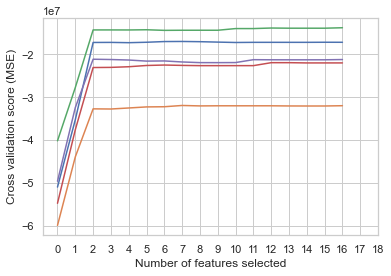

In [243]:
# Plotting the number of features vs. cross-validation roc_auc scores
fig, ax = plt.subplots()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (MSE)")
plt.plot(selector.grid_scores_)
plt.xticks(np.arange(0, 19, 1))
plt.show()

In [244]:
reg_X["ridge_x_terms"] = ["age", "children", "region_southwest", "smoker*bmi", "age_cluster_2"]

X_train = data_train_reg[reg_X["ridge_x_terms"]]
y_train = np.array(data_train_reg[reg_y]).reshape(-1, 1).flatten()

#### Ridge Regression: Hyperparameter Tuning
<u>Hyperparameters</u>:
- **alpha**: Regularization strength. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.

In [245]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define Pipeline for GridSearchCV
steps = [("Ridge", Ridge())]

pipeline = Pipeline(steps)

# Specify possible hyperparameters 
n_alphas = 100
parameters = {'Ridge__alpha': np.insert(np.logspace(-1, 5, n_alphas), 0, 0)
              }
# parameters = {'Ridge__alpha': [0]
#               }

# Instantiate GridSearchCV object
gs_cv = GridSearchCV(pipeline, parameters, scoring='neg_mean_squared_error', refit = "true", verbose=0)
gs_cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('Ridge', Ridge())]),
             param_grid={'Ridge__alpha': array([0.00000000e+00, 1.00000000e-01, 1.14975700e-01, 1.32194115e-01,
       1.51991108e-01, 1.74752840e-01, 2.00923300e-01, 2.31012970e-01,
       2.65608778e-01, 3.05385551e-01, 3.51119173e-01, 4.03701726e-01,
       4.64158883e-01, 5.33669923e-01, 6.13590727e-01, 7.05480231e-01,
       8.11130831e-01, 9....
       6.13590727e+03, 7.05480231e+03, 8.11130831e+03, 9.32603347e+03,
       1.07226722e+04, 1.23284674e+04, 1.41747416e+04, 1.62975083e+04,
       1.87381742e+04, 2.15443469e+04, 2.47707636e+04, 2.84803587e+04,
       3.27454916e+04, 3.76493581e+04, 4.32876128e+04, 4.97702356e+04,
       5.72236766e+04, 6.57933225e+04, 7.56463328e+04, 8.69749003e+04,
       1.00000000e+05])},
             refit='true', scoring='neg_mean_squared_error')

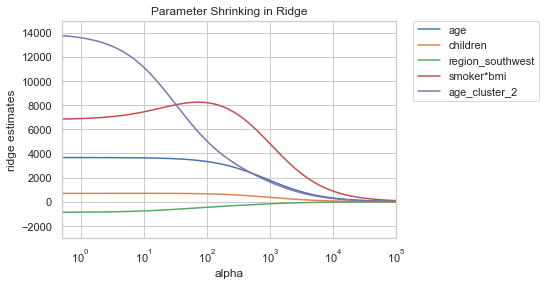

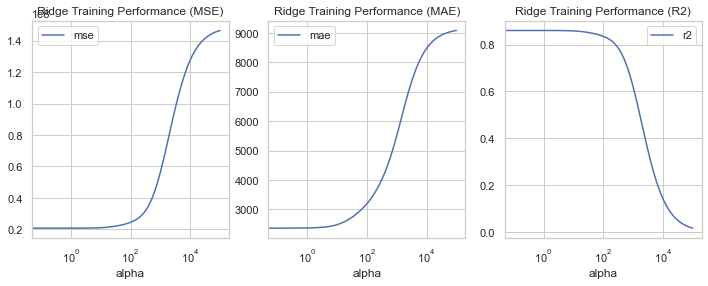

In [246]:
coefs = []
mse = []
mae = []
r2 = []
alphas = np.insert(np.logspace(-1, 5, n_alphas), 0, 0)

for a in alphas:
#     print(a)
    ridge = Ridge(alpha=a, fit_intercept=True)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

    y_pred = ridge.predict(X_train)
    r2.append(ridge.score(X_train, y_train))
    mse.append(mean_squared_error(y_train, y_pred))
    mae.append(mean_absolute_error(y_train, y_pred))
#     print(ridge.score(X_test, y_test))
#     print()

# #############################################################################
# Display results
coefs = np.array(coefs)
fig, ax = plt.subplots(1)
# print(coefs)
for (c,l) in zip(coefs.T, X_train.columns):
    sns.lineplot(ax=ax, x=alphas, y=c, label=l)

ax.set_xscale("log")
ax.set_ylabel("ridge estimates")
ax.set_xlabel('alpha')
ax.set_title('Parameter Shrinking in Ridge')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([-3e3, 15e3])
plt.xlim([0.5,1e5])
plt.show()


fig, ax = plt.subplots(1, 3, figsize=(12, 4))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

sns.lineplot(ax=ax[0], x=alphas, y=mse, label="mse")
sns.lineplot(ax=ax[1], x=alphas, y=mae, label="mae")
sns.lineplot(ax=ax[2], x=alphas, y=r2, label="r2")
# print(mae)
ax[0].set_xscale("log")
ax[0].set_xlabel('alpha')
ax[0].set_title('Ridge Training Performance (MSE)')
# print(mae)
ax[1].set_xscale("log")
ax[1].set_xlabel('alpha')
ax[1].set_title('Ridge Training Performance (MAE)')

ax[2].set_xscale("log")
ax[2].set_xlabel('alpha')
ax[2].set_title('Ridge Training Performance (R2)')

plt.show()

In [247]:
# best estimator
print(gs_cv.best_estimator_)
# print(gs_cv.getsupport())
# print(gs_cv.ranking_)

print("Best CV Score (RMSE): {}".format(np.sqrt(np.abs(gs_cv.best_score_))))
print("Tuned Model Parameters: {}".format(gs_cv.best_params_))
training_results["ridge_x_terms"] = np.sqrt(np.abs(gs_cv.best_score_))

# from sklearn.model_selection import cross_val_score
# all_scores = np.sqrt(np.abs(cross_val_score(estimator=gs_cv, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=5)))
# print(all_scores)
# # r^2
# all_scores = np.sqrt(np.abs(cross_val_score(estimator=gs_cv, X=X_train, y=y_train, scoring='r2', cv=5)))
# print(all_scores)
# print(np.mean(all_scores))

Pipeline(steps=[('Ridge', Ridge(alpha=0.1519911082952934))])
Best CV Score (RMSE): 4597.851400728133
Tuned Model Parameters: {'Ridge__alpha': 0.1519911082952934}


In [248]:
# save the best trained model
regression_models.append("ridge_x_terms")
pickle.dump(gs_cv, open("models/ridge_x_terms.sav", "wb"))

### 4.2 Clustered Ridge Regression (1 Ridge Regression per Cluster)

In [249]:
reg_X["clustered_ridge"] = ["age_cluster","age", "smoker*bmi","bmi*age0", "bmi*age1", "bmi*age2", "age0", "age1", 
    "age0*smoker_no", "age2*smoker_yes"]
X_train = data_train_reg[reg_X["clustered_ridge"]]
y_train = np.array(data_train_reg[reg_y]).reshape(-1, 1).flatten()

In [250]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

def ridge(data_train, reg_X, reg_y):
    X_train = data_train[reg_X]
    y_train = data_train[reg_y]

    # Specify possible hyperparameters 
    n_alphas = 10
    parameters = {'alpha': np.insert(np.logspace(-3, 7, n_alphas), 0, 0)
                  }

    # Instantiate GridSearchCV object
    ridge = GridSearchCV(Ridge(), parameters, scoring='neg_mean_squared_error', refit = "true", verbose=0)
    ridge.fit(X_train, y_train)

    # best estimator
#     print(ridge.best_estimator_)
    
    return ridge

In [251]:
class ClusteredRidge:
    def __init__(self):
        self.models = []
        self.y_pred = None
        self.best_params_ = []
        self.best_score_ = None
        self.model_scores = []
        
    def fit(self, data_train_reg, reg_X, reg_y):
        score_sum = 0
        number_total = data_train_reg.shape[0]
        for cluster in range(0,3):
            training_data = data_train_reg[data_train_reg["age_cluster"] == cluster]
            number = training_data.shape[0]
            model = ridge(training_data, reg_X, reg_y)
            # calculate score (neg_mse) as weighted avg
            self.model_scores.append(model.best_score_)
            score_sum = score_sum + model.best_score_ * (number/number_total)
            # save ridge model to list
            self.models.append(model)
            # save best params to list
            self.best_params_.append(model.best_params_)
        self.best_score_ = score_sum/3
            
            
    def predict(self, X_test):
        predictions = pd.DataFrame()
        for cluster in range(0,3):
            test_data = X_test[X_test["age_cluster"] == cluster].copy()
#             print(test_data.info())
#             print(test_data.head())
#             print(test_data.tail())

            # save df index for merging the results 
            index = test_data.index
            # add prediction for every cluster
            predictions = predictions.append(pd.DataFrame(data = self.models[cluster].predict(test_data), index=index))
       
        y_pred = np.array(predictions.sort_index()).flatten()
        return y_pred            

In [252]:
clusteredRidge = ClusteredRidge()
clusteredRidge.fit(data_train_reg, reg_X["clustered_ridge"], reg_y)
# clusteredRidge.predict(data_test[reg_X])
# print(clusteredRidge.predict(data_test[reg_X]))
# print(clusteredRidge.predict(data_test[reg_X]))
# print(clusteredRidge.model_scores)

In [253]:
print("Best CV Score (RMSE): {}".format(np.sqrt(np.abs(clusteredRidge.best_score_))))
print("Tuned Model Parameters: {}".format(clusteredRidge.best_params_))
training_results["clustered_ridge"] = np.sqrt(np.abs(clusteredRidge.best_score_))

# from sklearn.model_selection import cross_val_score
# all_scores = np.sqrt(np.abs(cross_val_score(estimator=gs_cv, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=5)))
# print(all_scores)
# # r^2
# all_scores = np.sqrt(np.abs(cross_val_score(estimator=gs_cv, X=X_train, y=y_train, scoring='r2', cv=5)))
# print(all_scores)
# print(np.mean(all_scores))

Best CV Score (RMSE): 2691.955927908613
Tuned Model Parameters: [{'alpha': 0.0}, {'alpha': 2.1544346900318843}, {'alpha': 0.001}]


In [254]:
# save the best trained model
regression_models.append("clustered_ridge")
pickle.dump(clusteredRidge, open("models/clustered_ridge.sav", "wb"))

### 4.3 LASSO-Regression
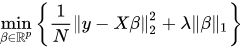
<img src="L1_and_L2_balls.svg.png" width=500 height=500 />

In [255]:
reg_X["lasso"] = ["age", "bmi", "children", "sex_male", "smoker_yes", "region_northeast", "region_southeast", "region_southwest", 
    "smoker*bmi", "age_cluster_0", "age_cluster_2", "bmi*age0", "bmi*age1", "bmi*age2", "age0", "age1", "age2", 
    "age0*smoker_no", "age2*smoker_yes"]
reg_X["lasso"] = ["age_cluster","age", "smoker*bmi","bmi*age0", "bmi*age1", "bmi*age2", "age0", "age1", 
    "age0*smoker_no"]
X_train = data_train_reg[reg_X["lasso"]]
y_train = np.array(data_train_reg[reg_y]).reshape(-1, 1).flatten()

<u>Hyperparameters</u>:
- **alpha**: Regularization strength. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.

In [256]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Specify possible hyperparameters 
n_alphas = 100
parameters = {'alpha': np.logspace(-3, 7, n_alphas),
              "max_iter": [100000]
              }
# Instantiate GridSearchCV object
gs_cv = GridSearchCV(Lasso(), parameters, scoring='neg_mean_squared_error', refit = "true", verbose=0)
gs_cv.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 1.26185688e-03, 1.59228279e-03, 2.00923300e-03,
       2.53536449e-03, 3.19926714e-03, 4.03701726e-03, 5.09413801e-03,
       6.42807312e-03, 8.11130831e-03, 1.02353102e-02, 1.29154967e-02,
       1.62975083e-02, 2.05651231e-02, 2.59502421e-02, 3.27454916e-02,
       4.13201240e-02, 5.21400829e-02, 6.57933225e-02, 8.30217...
       1.20450354e+05, 1.51991108e+05, 1.91791026e+05, 2.42012826e+05,
       3.05385551e+05, 3.85352859e+05, 4.86260158e+05, 6.13590727e+05,
       7.74263683e+05, 9.77009957e+05, 1.23284674e+06, 1.55567614e+06,
       1.96304065e+06, 2.47707636e+06, 3.12571585e+06, 3.94420606e+06,
       4.97702356e+06, 6.28029144e+06, 7.92482898e+06, 1.00000000e+07]),
                         'max_iter': [100000]},
             refit='true', scoring='neg_mean_squared_error')

In [257]:
# best estimator
print(gs_cv.best_estimator_)

print("Best CV Score (RMSE): {}".format(np.sqrt(np.abs(gs_cv.best_score_))))
print("Tuned Model Parameters: {}".format(gs_cv.best_params_))

training_results["lasso"] = np.sqrt(np.abs(gs_cv.best_score_))

print("\nLASSO FEATURE SELECTION:\n")
for c in range(0, X_train.columns.shape[0]):
    print("{}: \t{:.2f}".format(X_train.columns[c], gs_cv.best_estimator_.coef_[c]))

# from sklearn.model_selection import cross_val_score
# all_scores = np.sqrt(np.abs(cross_val_score(estimator=ridge, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=5)))
# print(all_scores)
# # r^2
# all_scores = np.sqrt(np.abs(cross_val_score(estimator=ridge, X=X_train, y=y_train, scoring='r2', cv=5)))
# print(all_scores)
# print(np.mean(all_scores))

Lasso(alpha=17.47528400007683, max_iter=100000)
Best CV Score (RMSE): 4659.321710689284
Tuned Model Parameters: {'alpha': 17.47528400007683, 'max_iter': 100000}

LASSO FEATURE SELECTION:

age_cluster: 	14074.41
age: 	3585.50
smoker*bmi: 	461.66
bmi*age0: 	-22.19
bmi*age1: 	1599.81
bmi*age2: 	4127.02
age0: 	113.83
age1: 	-48.98
age0*smoker_no: 	0.00


In [258]:
# save the best trained model
regression_models.append("lasso")
pickle.dump(gs_cv, open("models/lasso.sav", "wb"))

### 4.4 OLS-Regression (statsmodels)

In [259]:
reg_X["ols_regression"] = ["age", "bmi", "children", "age_cluster_0", "age_cluster_2"]
reg_X["ols_regression"] = ["age", "children", "region_southwest", "smoker*bmi", "age_cluster_2"]

X_train = data_train_reg[reg_X["ols_regression"]]
y_train = np.array(data_train_reg[reg_y]).reshape(-1, 1).flatten()

In [260]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
statsmod = sm.OLS(y_train,X_train).fit()

statsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1147.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:26:51   Log-Likelihood:                -9213.5
No. Observations:                 936   AIC:                         1.844e+04
Df Residuals:                     930   BIC:                         1.847e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.189e+04    192.176     61.887      0.000    1.15e+04    1.23e+04
age               3662.6649    149.575     24.487      0.000    3369.122    3956.208
children           697.2045    149.538      4.662      0.000     403.733     990.677
region_southwest  -870.5627    346.879     -2.510      0.012   -1551.319    -189.807
smoker*bmi        6803.3546    253.246     26.865      0.000    6306.354    7300.355
age_cluster_2     1.395e+04    798.376     17.467      0.000    1.24e+04    1.55e+04
==============================================================================
Omnibus:                      591.879   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5174.028
Skew:                           2.885   Prob(JB):                         0.00
Kurtosis:                      12.969   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
training_results["ols_regression"] = np.sqrt(mean_squared_error(y_train, statsmod.fittedvalues))

In [262]:
# save the best trained model
regression_models.append("ols_regression")
pickle.dump(statsmod, open("models/ols_regression.sav", "wb"))

### 4.5 Random Forest Regressor

<u>Hyperparameters</u>:
- **max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


- **max_features**: The number of features to consider when looking for the best split:


- **n_estimators**: The number of trees in the forest.


In [263]:
# reg_X["random_forest_reg"] = ["age", "bmi", "children", "sex_male", "smoker_yes", "region_northeast", "region_southeast", "region_southwest", 
#     "smoker*bmi", "age_cluster_0", "age_cluster_2", "bmi*age0", "bmi*age1", "bmi*age2", "age0", "age1", "age2", 
#     "age0*smoker_no", "age2*smoker_yes"]
reg_X["random_forest_reg"] = ["age", "bmi", "smoker_yes", 
    "smoker*bmi", "age_cluster_0", "age_cluster_2", "bmi*age0", "bmi*age1", "bmi*age2", "age0", "age2", 
    "age0*smoker_no", "age2*smoker_yes"]
# reg_X["random_forest_reg"] = ["age", "children", "region_southwest", "smoker*bmi", "age_cluster_2"]

X_train = data_train_reg[reg_X["random_forest_reg"]]

y_train = np.array(data_train_reg[reg_y]).reshape(-1, 1).flatten()

In [264]:
from sklearn.ensemble import RandomForestRegressor

# Specify possible hyperparameters 
# parameters = {
#         'max_depth': [10],
#         'max_features': ['log2'],
#         'n_estimators': np.insert(np.arange(100, 1000, 100), 0, 50)
#               }
# Specify possible hyperparameters 
parameters = {
    'max_depth': [1, 2, 3, 5, 10],
    'max_features': ['log2'],
    'n_estimators': np.insert(np.arange(100, 1000, 100), 0, 10)
}
parameters = {
        'max_depth': [5],
        'max_features': ['log2'],
        'n_estimators': [300]
              }

# Instantiate GridSearchCV object
gs_cv = GridSearchCV(RandomForestRegressor(), parameters, scoring='neg_mean_squared_error', refit = "true", verbose=5, n_jobs=-1)
gs_cv.fit(X_train, y_train)

# best estimator
print(gs_cv.best_estimator_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
RandomForestRegressor(max_depth=5, max_features='log2', n_estimators=300)


In [265]:
print("Best CV Score (RMSE): {}".format(np.sqrt(np.abs(gs_cv.best_score_))))
print("Tuned Model Parameters: {}".format(gs_cv.best_params_))

training_results["random_forest_reg"] = np.sqrt(np.abs(gs_cv.best_score_))

print("\nFEATURE IMPORTANCES:\n")
for c in range(0, X_train.columns.shape[0]):
    print("{}: \t{:.2f}".format(X_train.columns[c], gs_cv.best_estimator_.feature_importances_[c]))



# from sklearn.model_selection import cross_val_score
# all_scores = np.sqrt(np.abs(cross_val_score(estimator=gs_cv, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=5)))
# print(all_scores)
# # r^2
# all_scores = np.sqrt(np.abs(cross_val_score(estimator=gs_cv, X=X_train, y=y_train, scoring='r2', cv=5)))
# print(all_scores)
# print(np.mean(all_scores))

Best CV Score (RMSE): 4708.778409890828
Tuned Model Parameters: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 300}

FEATURE IMPORTANCES:

age: 	0.03
bmi: 	0.02
smoker_yes: 	0.11
smoker*bmi: 	0.23
age_cluster_0: 	0.14
age_cluster_2: 	0.18
bmi*age0: 	0.00
bmi*age1: 	0.02
bmi*age2: 	0.09
age0: 	0.05
age2: 	0.03
age0*smoker_no: 	0.05
age2*smoker_yes: 	0.04


In [266]:
# save the best trained model
regression_models.append("random_forest_reg")
pickle.dump(gs_cv, open("models/random_forest_reg.sav", "wb"))

### 4.6 Gradient Boosting Regression

<u>Hyperparameters</u>:
- **n_estimators**: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.


- **learning_rate**: Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.


- **subsample**: The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.



In [267]:
reg_X["gradient_boosting_reg"] = ["age", "bmi", "children", "sex_male", "smoker_yes", "region_northeast", "region_southeast", "region_southwest", 
    "smoker*bmi", "age_cluster_0", "age_cluster_2", "bmi*age0", "bmi*age1", "bmi*age2", "age0", "age1", "age2", 
    "age0*smoker_no", "age2*smoker_yes"]
reg_X["gradient_boosting_reg"] = [ "age_cluster_2", "bmi*age1", "bmi*age2", "age0", "age2"]
reg_X["gradient_boosting_reg"] = ["age", "children", "region_southwest", "smoker*bmi", "age_cluster_2"]
X_train = data_train_reg[reg_X["gradient_boosting_reg"]]
y_train = np.array(data_train_reg[reg_y]).reshape(-1, 1).flatten()

In [268]:
from sklearn.ensemble import GradientBoostingRegressor

# Specify possible hyperparameters 
parameters = {'n_estimators': [50, 100, 200],
              "learning_rate": [0.03, 0.04, 0.045, 0.05, 0.055, 0.06, 0.07, 0.1],
              "subsample": [0.8, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1]
              }
parameters = {'n_estimators': [100],
              "learning_rate": [0.05],
              "subsample": [1]
              }

# Instantiate GridSearchCV object
gs_cv = GridSearchCV(GradientBoostingRegressor(), parameters, scoring='neg_mean_squared_error', refit = "true", verbose=0)
gs_cv.fit(X_train, y_train)

# best estimator
print(gs_cv.best_estimator_)

GradientBoostingRegressor(learning_rate=0.05, subsample=1)


In [269]:
print("Best CV Score (RMSE): {}".format(np.sqrt(np.abs(gs_cv.best_score_))))
print("Tuned Model Parameters: {}".format(gs_cv.best_params_))

training_results["gradient_boosting_reg"] = np.sqrt(np.abs(gs_cv.best_score_))

print("\nFEATURE IMPORTANCES:\n")
for c in range(0, X_train.columns.shape[0]):
    print("{}: \t{:.2f}".format(X_train.columns[c], gs_cv.best_estimator_.feature_importances_[c]))



# from sklearn.model_selection import cross_val_score
# all_scores = np.sqrt(np.abs(cross_val_score(estimator=gs_cv, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=5)))
# print(all_scores)
# # r^2
# all_scores = np.sqrt(np.abs(cross_val_score(estimator=gs_cv, X=X_train, y=y_train, scoring='r2', cv=5)))
# print(all_scores)
# print(np.mean(all_scores))

Best CV Score (RMSE): 4593.299016472459
Tuned Model Parameters: {'learning_rate': 0.05, 'n_estimators': 100, 'subsample': 1}

FEATURE IMPORTANCES:

age: 	0.11
children: 	0.01
region_southwest: 	0.00
smoker*bmi: 	0.87
age_cluster_2: 	0.00


In [270]:
# save the best trained model
regression_models.append("gradient_boosting_reg")
pickle.dump(gs_cv, open("models/gradient_boosting_reg.sav", "wb"))

### 4.7 Neural Network

In [271]:
reg_X["neural_net"] = ["age_cluster","age", "smoker*bmi","bmi*age0", "bmi*age1", "bmi*age2", "age0", "age1", 
    "age0*smoker_no", "age2*smoker_yes"]
X_train = data_train_reg[reg_X["neural_net"]]
y_train = np.array(data_train_reg[reg_y]).reshape(-1, 1).flatten()

from sklearn.preprocessing import MinMaxScaler
nn_y_scaler = MinMaxScaler()
y_train = nn_y_scaler.fit_transform(np.array(data_train_reg[reg_y]))

nn_y_min = np.min(data_train_reg[reg_y])
nn_y_max = np.max(data_train_reg[reg_y])

In [272]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=10, kernel_initializer='normal', activation='sigmoid'))
#     model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation="sigmoid"))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

print(X_train.shape, y_train.shape)

(936, 10) (936, 1)


In [273]:
# evaluate model
neural_net = KerasRegressor(build_fn=baseline_model, epochs=1000, batch_size=100, verbose=0)
kfold = KFold(n_splits=5)
results = cross_val_score(neural_net, X_train, y_train, cv=kfold)

neural_net.fit(X_train, y_train)

In [274]:
print("Baseline: %.2f (%.2f) RMSE" % (np.sqrt(np.abs(results.mean())), np.sqrt(np.abs(results.std()))))
print(((nn_y_max - nn_y_min) * np.sqrt(np.abs(results.mean()))).item())

Baseline: 0.07 (0.04) RMSE
4695.918632151114


In [275]:
# save the best trained model
regression_models.append("neural_net")
training_results["neural_net"] = ( (nn_y_max - nn_y_min) * np.sqrt(np.abs(results.mean()))).item()

## 5. Model Training: Single Regression Models (no Cluster Information)
    5.1 Ridge Regression
    5.2 Random Forest Regressor
    5.3 Gradient Boosting Regressor
    5.4 Neural Network

### 5.1 Ridge Regression (Single Model)

<u>Hyperparameters</u>:
- **alpha**: Regularization strength. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.

In [276]:
reg_X["ridge_single"] = ["age", "bmi", "children", "smoker_yes", "smoker*bmi"]
X_train = data_train[reg_X["ridge_single"]]
y_train = np.array(data_train[reg_y]).reshape(-1, 1).flatten()

In [277]:
ridge_reg = ridge(data_train, reg_X["ridge_single"], reg_y)
single_training_results["ridge_single"] = np.sqrt(np.abs(ridge_reg.best_score_))
print(single_training_results["ridge_single"])

4938.270961588569


In [278]:
# save the best trained model
single_regression_models.append("ridge_single")
pickle.dump(ridge_reg, open("models/ridge_single.sav", "wb"))

### 5.2 Random Forest Regressor (Single Model)

<u>Hyperparameters</u>:
- **max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


- **max_features**: The number of features to consider when looking for the best split:


- **n_estimators**: The number of trees in the forest.


In [279]:
reg_X["rand_forest_reg_single"] = ["age", "bmi", "children", "sex_male", "smoker_yes", "region_northeast", "region_southeast", "region_southwest", 
    "smoker*bmi", "age_cluster_0", "age_cluster_2", "bmi*age0", "bmi*age1", "bmi*age2", "age0", "age1", "age2", 
    "age0*smoker_no", "age2*smoker_yes"]
reg_X["rand_forest_reg_single"] = ["age", "bmi", "children", "sex_male", "smoker_yes", "region_northeast", "region_southeast", 
    "smoker*bmi"]
X_train = data_train[reg_X["rand_forest_reg_single"]]
y_train = np.array(data_train[reg_y]).reshape(-1, 1).flatten()

In [280]:
from sklearn.ensemble import RandomForestRegressor

# Specify possible hyperparameters 
parameters = {
        'max_depth': [10],
        'max_features': ['log2'],
        'n_estimators': np.insert(np.arange(100, 1000, 100), 0, 50)
              }
parameters = {
        'max_depth': [10],
        'max_features': ['log2'],
        'n_estimators': [800]
              }
# Instantiate GridSearchCV object
gs_cv = GridSearchCV(RandomForestRegressor(), parameters, scoring='neg_mean_squared_error', refit = "true", verbose=0)
gs_cv.fit(X_train, y_train)

# best estimator
print(gs_cv.best_estimator_)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=800)


In [281]:
print("Best CV Score (RMSE): {}".format(np.sqrt(np.abs(gs_cv.best_score_))))
print("Tuned Model Parameters: {}".format(gs_cv.best_params_))

single_training_results["rand_forest_reg_single"] = np.sqrt(np.abs(gs_cv.best_score_))

print("\nFEATURE IMPORTANCES:\n")
for c in range(0, X_train.columns.shape[0]):
    print("{}: \t{:.2f}".format(X_train.columns[c], gs_cv.best_estimator_.feature_importances_[c]))



# from sklearn.model_selection import cross_val_score
# all_scores = np.sqrt(np.abs(cross_val_score(estimator=gs_cv, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=5)))
# print(all_scores)
# # r^2
# all_scores = np.sqrt(np.abs(cross_val_score(estimator=gs_cv, X=X_train, y=y_train, scoring='r2', cv=5)))
# print(all_scores)
# print(np.mean(all_scores))

Best CV Score (RMSE): 4752.358188849131
Tuned Model Parameters: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 800}

FEATURE IMPORTANCES:

age: 	0.12
bmi: 	0.09
children: 	0.02
sex_male: 	0.01
smoker_yes: 	0.29
region_northeast: 	0.01
region_southeast: 	0.00
smoker*bmi: 	0.46


In [282]:
# save the best trained model
single_regression_models.append("rand_forest_reg_single")
pickle.dump(gs_cv, open("models/rand_forest_reg_single.sav", "wb"))

### 5.3 Gradient Boosting Regression (Single Model)

<u>Hyperparameters</u>:
- **n_estimators**: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.


- **learning_rate**: Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.


- **subsample**: The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.



In [283]:
reg_X["grad_boost_reg_single"] = ["age", "bmi", "children", "sex_male", "smoker_yes", "region_northeast", "region_southeast", "region_southwest", 
    "smoker*bmi", "age_cluster_0", "age_cluster_2", "bmi*age0", "bmi*age1", "bmi*age2", "age0", "age1", "age2", 
    "age0*smoker_no", "age2*smoker_yes"]
reg_X["grad_boost_reg_single"] = ["age", "bmi", "children", "smoker_yes", "smoker*bmi"]
X_train = data_train[reg_X["grad_boost_reg_single"]]
y_train = np.array(data_train[reg_y]).reshape(-1, 1).flatten()

In [284]:
from sklearn.ensemble import GradientBoostingRegressor

# Specify possible hyperparameters 
parameters = {'n_estimators': [50, 100, 200],
              "learning_rate": [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.25, 0.5],
              "subsample": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
              }
parameters = {'n_estimators': [75, 100, 150],
              "learning_rate": [0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.07, 0.1],
              "subsample": [0.4, 0.5, 0.6, 0.7, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.975, 1]
              }
parameters = {'n_estimators': [100],
              "learning_rate": [0.045],
              "subsample": [0.875]
              }
# Instantiate GridSearchCV object
gs_cv = GridSearchCV(GradientBoostingRegressor(random_state=42), parameters, scoring='neg_mean_squared_error', refit = "true", verbose=0, n_jobs=-1)
gs_cv.fit(X_train, y_train)

# best estimator
print(gs_cv.best_estimator_)

GradientBoostingRegressor(learning_rate=0.045, random_state=42, subsample=0.875)


In [285]:
print("Best CV Score (RMSE): {}".format(np.sqrt(np.abs(gs_cv.best_score_))))
print("Tuned Model Parameters: {}".format(gs_cv.best_params_))

single_training_results["grad_boost_reg_single"] = np.sqrt(np.abs(gs_cv.best_score_))

print("\nFEATURE IMPORTANCES:\n")
for c in range(0, X_train.columns.shape[0]):
    print("{}: \t{:.2f}".format(X_train.columns[c], gs_cv.best_estimator_.feature_importances_[c]))

# from sklearn.model_selection import cross_val_score
# all_scores = np.sqrt(np.abs(cross_val_score(estimator=gs_cv, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=5)))
# print(all_scores)
# # r^2
# all_scores = np.sqrt(np.abs(cross_val_score(estimator=gs_cv, X=X_train, y=y_train, scoring='r2', cv=5)))
# print(all_scores)
# print(np.mean(all_scores))

Best CV Score (RMSE): 4603.210125271665
Tuned Model Parameters: {'learning_rate': 0.045, 'n_estimators': 100, 'subsample': 0.875}

FEATURE IMPORTANCES:

age: 	0.12
bmi: 	0.02
children: 	0.01
smoker_yes: 	0.02
smoker*bmi: 	0.83


In [286]:
# save the best trained model
single_regression_models.append("grad_boost_reg_single")
pickle.dump(gs_cv, open("models/grad_boost_reg_single.sav", "wb"))

### 5.4 Neural Network (Single Model)

In [287]:
reg_X["neural_net_single"] = ["age", "bmi", "children", "sex_male", "smoker_yes", "region_northeast", "region_southeast", "region_southwest", 
    "smoker*bmi"]
X_train = data_train[reg_X["neural_net_single"]]
y_train = np.array(data_train[reg_y]).reshape(-1, 1).flatten()

# scale target value for NN
from sklearn.preprocessing import MinMaxScaler
nn_pure_y_scaler = MinMaxScaler()
y_train = nn_pure_y_scaler.fit_transform(data_train[reg_y])

nn_y_min = np.min(data_train[reg_y])
nn_y_max = np.max(data_train[reg_y])

In [288]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(18, input_dim=9, kernel_initializer='normal', activation='sigmoid'))
#     model.add(Dense(18, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation="sigmoid"))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

print(X_train.shape, y_train.shape)

(936, 9) (936, 1)


In [289]:
# evaluate model
neural_net_pure = KerasRegressor(build_fn=baseline_model, epochs=500, batch_size=100, verbose=0)
kfold = KFold(n_splits=5)
results = cross_val_score(neural_net_pure, X_train, y_train, cv=kfold)

neural_net_pure.fit(X_train, y_train)

In [290]:
print("Baseline: %.2f (%.2f) RMSE" % (np.sqrt(np.abs(results.mean())), np.sqrt(np.abs(results.std()))))
single_regression_models.append("neural_net_single")
single_training_results["neural_net_single"] = ( (nn_y_max - nn_y_min) * np.sqrt(np.abs(results.mean()))).item()
print("cross-validated RMSE:", single_training_results["neural_net_single"])

Baseline: 0.08 (0.04) RMSE
cross-validated RMSE: 4796.793006385908


## 6. Prediction on the Test Data Set

### 6.1 Prediction: Testing the Sequential Models (Classification + Regression)

------------------ svm -------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       324
           1       0.47      0.94      0.62        32
           2       0.93      0.93      0.93        46

    accuracy                           0.91       402
   macro avg       0.80      0.92      0.84       402
weighted avg       0.95      0.91      0.92       402

[[292   0   0]
 [ 31  30   3]
 [  1   2  43]]


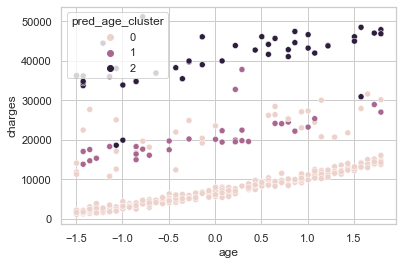

#################  ridge_x_terms
['age', 'children', 'region_southwest', 'smoker*bmi', 'age_cluster_2']
(402,)


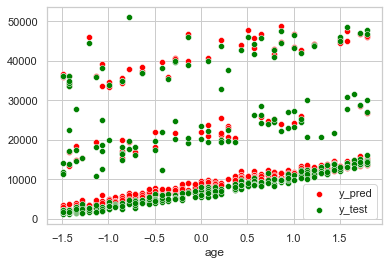

#################  clustered_ridge
['age_cluster', 'age', 'smoker*bmi', 'bmi*age0', 'bmi*age1', 'bmi*age2', 'age0', 'age1', 'age0*smoker_no', 'age2*smoker_yes']
(402,)


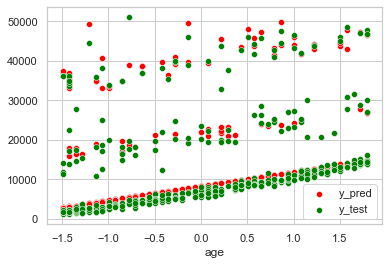

#################  lasso
['age_cluster', 'age', 'smoker*bmi', 'bmi*age0', 'bmi*age1', 'bmi*age2', 'age0', 'age1', 'age0*smoker_no']
(402,)


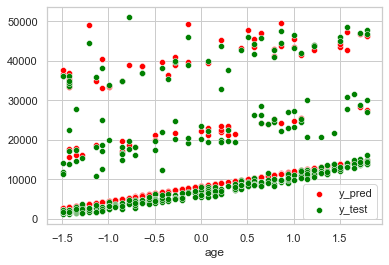

#################  ols_regression
['age', 'children', 'region_southwest', 'smoker*bmi', 'age_cluster_2']
(402,)


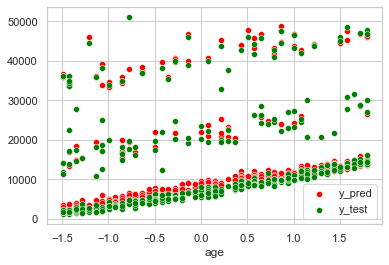

#################  random_forest_reg
['age', 'bmi', 'smoker_yes', 'smoker*bmi', 'age_cluster_0', 'age_cluster_2', 'bmi*age0', 'bmi*age1', 'bmi*age2', 'age0', 'age2', 'age0*smoker_no', 'age2*smoker_yes']
(402,)


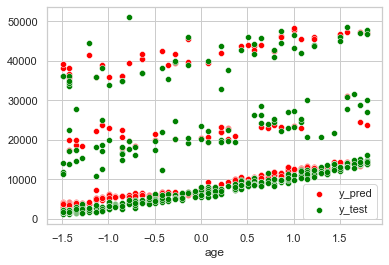

#################  gradient_boosting_reg
['age', 'children', 'region_southwest', 'smoker*bmi', 'age_cluster_2']
(402,)


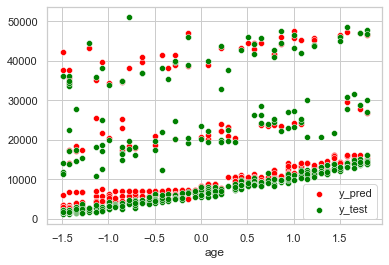

#################  neural_net
['age_cluster', 'age', 'smoker*bmi', 'bmi*age0', 'bmi*age1', 'bmi*age2', 'age0', 'age1', 'age0*smoker_no', 'age2*smoker_yes']
(402,)


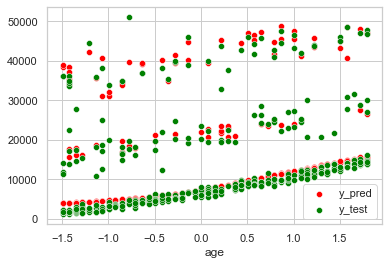

------------------ rand_forest_class -------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       324
           1       0.52      0.94      0.67        35
           2       0.93      1.00      0.97        43

    accuracy                           0.92       402
   macro avg       0.82      0.95      0.86       402
weighted avg       0.95      0.92      0.93       402

[[292   0   0]
 [ 31  33   0]
 [  1   2  43]]


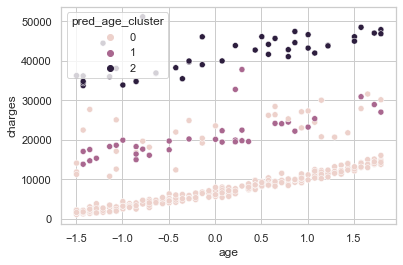

#################  ridge_x_terms
['age', 'children', 'region_southwest', 'smoker*bmi', 'age_cluster_2']
(402,)


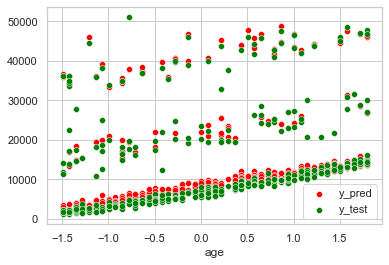

#################  clustered_ridge
['age_cluster', 'age', 'smoker*bmi', 'bmi*age0', 'bmi*age1', 'bmi*age2', 'age0', 'age1', 'age0*smoker_no', 'age2*smoker_yes']
(402,)


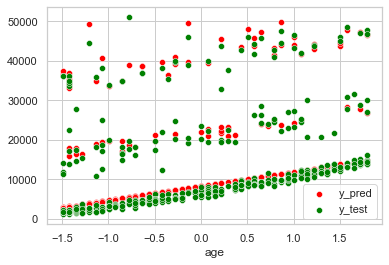

#################  lasso
['age_cluster', 'age', 'smoker*bmi', 'bmi*age0', 'bmi*age1', 'bmi*age2', 'age0', 'age1', 'age0*smoker_no']
(402,)


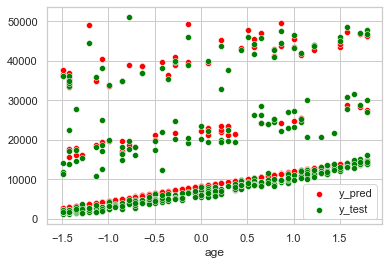

#################  ols_regression
['age', 'children', 'region_southwest', 'smoker*bmi', 'age_cluster_2']
(402,)


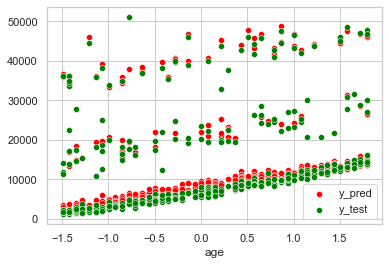

#################  random_forest_reg
['age', 'bmi', 'smoker_yes', 'smoker*bmi', 'age_cluster_0', 'age_cluster_2', 'bmi*age0', 'bmi*age1', 'bmi*age2', 'age0', 'age2', 'age0*smoker_no', 'age2*smoker_yes']
(402,)


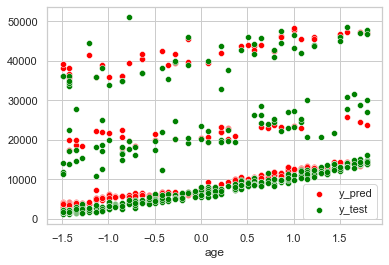

#################  gradient_boosting_reg
['age', 'children', 'region_southwest', 'smoker*bmi', 'age_cluster_2']
(402,)


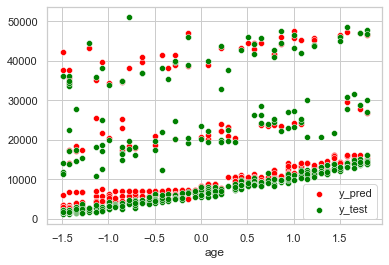

#################  neural_net
['age_cluster', 'age', 'smoker*bmi', 'bmi*age0', 'bmi*age1', 'bmi*age2', 'age0', 'age1', 'age0*smoker_no', 'age2*smoker_yes']
(402,)


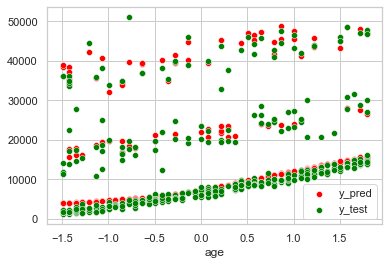

------------------ grad_boost_class -------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       324
           1       0.52      0.94      0.67        35
           2       0.93      1.00      0.97        43

    accuracy                           0.92       402
   macro avg       0.82      0.95      0.86       402
weighted avg       0.95      0.92      0.93       402

[[292   0   0]
 [ 31  33   0]
 [  1   2  43]]


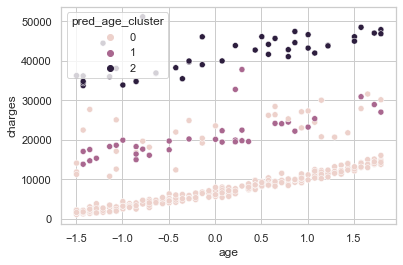

#################  ridge_x_terms
['age', 'children', 'region_southwest', 'smoker*bmi', 'age_cluster_2']
(402,)


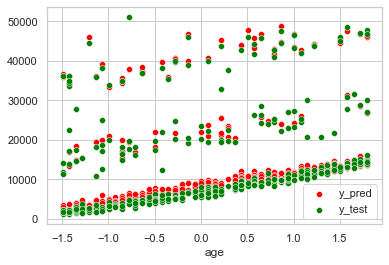

#################  clustered_ridge
['age_cluster', 'age', 'smoker*bmi', 'bmi*age0', 'bmi*age1', 'bmi*age2', 'age0', 'age1', 'age0*smoker_no', 'age2*smoker_yes']
(402,)


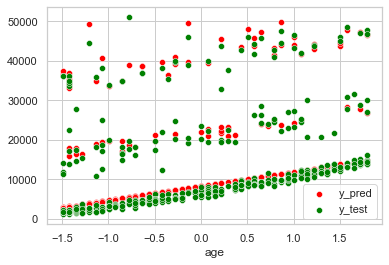

#################  lasso
['age_cluster', 'age', 'smoker*bmi', 'bmi*age0', 'bmi*age1', 'bmi*age2', 'age0', 'age1', 'age0*smoker_no']
(402,)


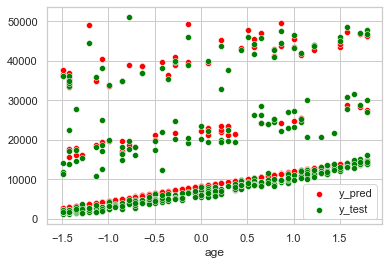

#################  ols_regression
['age', 'children', 'region_southwest', 'smoker*bmi', 'age_cluster_2']
(402,)


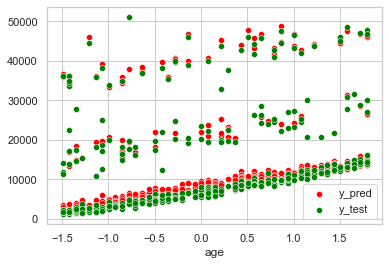

#################  random_forest_reg
['age', 'bmi', 'smoker_yes', 'smoker*bmi', 'age_cluster_0', 'age_cluster_2', 'bmi*age0', 'bmi*age1', 'bmi*age2', 'age0', 'age2', 'age0*smoker_no', 'age2*smoker_yes']
(402,)


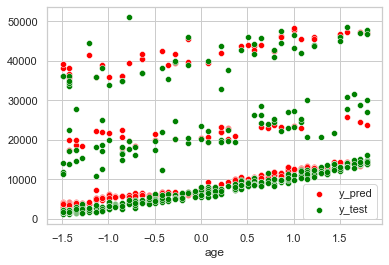

#################  gradient_boosting_reg
['age', 'children', 'region_southwest', 'smoker*bmi', 'age_cluster_2']
(402,)


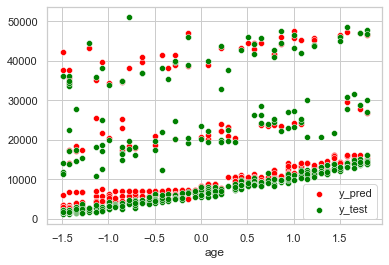

#################  neural_net
['age_cluster', 'age', 'smoker*bmi', 'bmi*age0', 'bmi*age1', 'bmi*age2', 'age0', 'age1', 'age0*smoker_no', 'age2*smoker_yes']
(402,)


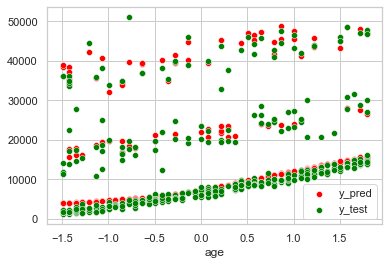

In [291]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#Evaluate classification on test data
prediction_results = {}

for cm in classification_models:
    # specify test data for classification
    X_test = data_test[class_X].copy()
    y_test = np.array(data_test[class_y]).reshape(-1, 1).flatten()
    
    print("------------------", cm, "-------------------")
    class_model = pickle.load(open("models/"+cm+".sav", "rb"))
#     print(class_model)
    
    # add classification result to test data
    y_pred = class_model.predict(X_test[class_X])
    print(classification_report(y_pred, y_test))
    print(confusion_matrix(y_test, y_pred, labels=[0,1,2]))
    
    class_scores = {
        "accuracy": accuracy_score(y_test, y_pred)
    }
    
    data_test_reg = data_test.copy()
    data_test_reg["pred_age_cluster"] = y_pred.copy()
    data_test_reg["age_cluster"] = y_pred.copy()
    
#     print("\ny_pred added")
#     print(data_test_reg.info())
#     print(data_test_reg["age_cluster"])
    sns.scatterplot(x = data_test_reg["age"], y=data_test_reg["charges"], hue=data_test_reg["pred_age_cluster"])
    plt.show()

    
    # replace real age_cluster with predicted age cluster from classification
#     df = pd.DataFrame()
#     df[["age_cluster_0", "age_cluster_1", "age_cluster_2"]] = pd.get_dummies(data_test["pred_age_cluster"].copy(), drop_first=False)
#     print(df.info())
    data_test_reg[["age_cluster_0", "age_cluster_1", "age_cluster_2"]] = pd.get_dummies(data_test_reg["pred_age_cluster"].copy(), drop_first=False)
#     print("\nage cluster dummies added")
#     print(data_test.info())

    data_test_reg["bmi*age0"] = data_test_reg["age_cluster_0"].copy()*data_test_reg["bmi"].copy()
    data_test_reg["bmi*age1"] = data_test_reg.loc[:,"age_cluster_1"]*data_test_reg["bmi"]
    data_test_reg["bmi*age2"] = data_test_reg.loc[:,"age_cluster_2"]*data_test_reg["bmi"]

    data_test_reg["age0"] = data_test_reg["age_cluster_0"]*data_test_reg["age"]
    data_test_reg["age1"] = data_test_reg["age_cluster_1"]*data_test_reg["age"]
    data_test_reg["age2"] = data_test_reg["age_cluster_2"]*data_test_reg["age"]
    data_test_reg["age0*smoker_no"] = data_test_reg["age_cluster_0"]*data_test_reg["age"]*(1-data_test_reg["smoker_yes"])
    data_test_reg["age2*smoker_yes"] = data_test_reg["age_cluster_2"]*data_test_reg["age"]*data_test_reg["smoker_yes"]
    
#     print("\nall variables added")
#     print(data_test.info())
#     print(y_pred.shape)
#     print(reg_X)
    
    new_entry = {
            "class_score": class_scores    
            }
    
    for rm in regression_models:
        print("################# ",rm)
        # specify test data for regression
        X_test = data_test_reg[reg_X[rm]]
        print(reg_X[rm])
        y_test = np.array(data_test_reg[reg_y]).reshape(-1, 1).flatten()
#         print(X_test[0:10])
#         print(y_test[0:10])
        if rm == "neural_net":
            reg_model = neural_net
        else:
            reg_model = pickle.load(open("models/"+rm+".sav", "rb"))
        
        # Predict with regression model
#         print(X_test.info())
        if rm == "ols_regression":
            y_pred = reg_model.predict(sm.add_constant(X_test))
        elif rm == "neural_net":
            y_pred = nn_y_scaler.inverse_transform(reg_model.predict(X_test).reshape(-1, 1))
            y_pred = y_pred.reshape(-1, )
        else:
            y_pred = reg_model.predict(X_test)
            
        print(y_pred.shape)
            
        sns.scatterplot(x = data_test_reg["age"], y=y_pred, label="y_pred", color="red")
        sns.scatterplot(x = data_test_reg["age"], y=y_test, label="y_test", color="green")

        plt.show()
        
        # Calculate regression metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        scores = {
            "rmse": rmse,
            "mae": mae,
            "r2": r2            
        }
        
        new_entry.update({str(rm): scores})
#         print("--------update", scores)

    # add to dict
    prediction_results.update({str(cm): new_entry})

In [292]:
x = []
y = []
models = []
for cm in prediction_results:
    for rm in prediction_results[cm]:
        print(cm+"->"+rm+":")
        if rm != "class_score":
            print(prediction_results[cm][rm])
            models.append(cm+"+"+rm)
            x.append(prediction_results[cm][rm]["rmse"])
            y.append(prediction_results[cm][rm]["mae"])

        for s in prediction_results[cm][rm]:
            print("\t", s, prediction_results[cm][rm][s])
    print("\n")

svm->class_score:
	 accuracy 0.9079601990049752
svm->ridge_x_terms:
{'rmse': 4559.966170530843, 'mae': 2411.5121821100297, 'r2': 0.8527601130760974}
	 rmse 4559.966170530843
	 mae 2411.5121821100297
	 r2 0.8527601130760974
svm->clustered_ridge:
{'rmse': 4568.484334057749, 'mae': 2508.2148892272617, 'r2': 0.8522095015833457}
	 rmse 4568.484334057749
	 mae 2508.2148892272617
	 r2 0.8522095015833457
svm->lasso:
{'rmse': 4562.8115936998465, 'mae': 2505.3459228306065, 'r2': 0.8525763000890569}
	 rmse 4562.8115936998465
	 mae 2505.3459228306065
	 r2 0.8525763000890569
svm->ols_regression:
{'rmse': 4560.5509421512925, 'mae': 2411.4006426455785, 'r2': 0.8527223464677905}
	 rmse 4560.5509421512925
	 mae 2411.4006426455785
	 r2 0.8527223464677905
svm->random_forest_reg:
{'rmse': 4515.218977120326, 'mae': 2597.6097515355186, 'r2': 0.8556356803274469}
	 rmse 4515.218977120326
	 mae 2597.6097515355186
	 r2 0.8556356803274469
svm->gradient_boosting_reg:
{'rmse': 4425.730562775533, 'mae': 2419.597293

class/reg,class. accuracy,ridge_x_terms,clustered_ridge,lasso,ols_regression,random_forest_reg,gradient_boosting_reg,neural_net
svm,0.91,4559.97 (4597.85),4568.48 (2691.96),4562.81 (4659.32),4560.55 (4557.65),4515.22 (4708.78),4425.73 (4593.30),4509.00 (4695.92)
rand_forest_class,0.92,4379.63 (4597.85),4424.33 (2691.96),4418.48 (4659.32),4379.56 (4557.65),4516.54 (4708.78),4425.73 (4593.30),4405.50 (4695.92)
grad_boost_class,0.92,4379.63 (4597.85),4424.33 (2691.96),4418.48 (4659.32),4379.56 (4557.65),4516.54 (4708.78),4425.73 (4593.30),4405.50 (4695.92)


class/reg,class. accuracy,ridge_x_terms,clustered_ridge,lasso,ols_regression,random_forest_reg,gradient_boosting_reg,neural_net
svm,0.91,2411.51,2508.21,2505.35,2411.40,2597.61,2419.60,2484.03
rand_forest_class,0.92,2307.86,2418.76,2414.80,2307.33,2602.22,2419.60,2410.09
grad_boost_class,0.92,2307.86,2418.76,2414.80,2307.33,2602.22,2419.60,2410.09


class/reg,class. accuracy,ridge_x_terms,clustered_ridge,lasso,ols_regression,random_forest_reg,gradient_boosting_reg,neural_net
svm,0.91,0.8528,0.8522,0.8526,0.8527,0.8556,0.8613,0.8560
rand_forest_class,0.92,0.8642,0.8614,0.8618,0.8642,0.8556,0.8613,0.8626
grad_boost_class,0.92,0.8642,0.8614,0.8618,0.8642,0.8556,0.8613,0.8626


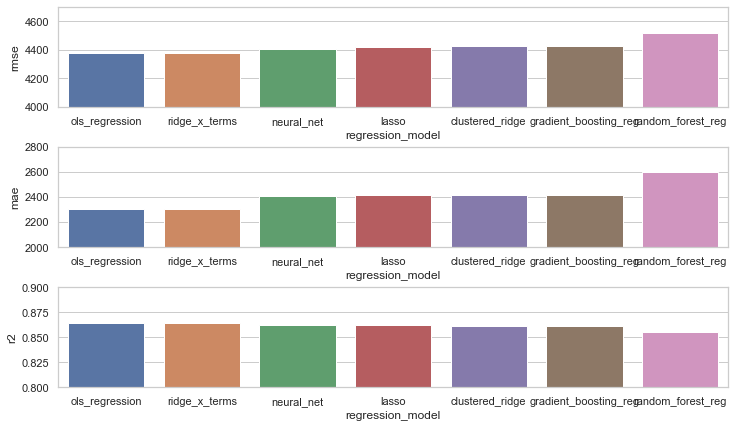

In [293]:
from IPython.display import HTML, display
import tabulate

def display_table(data):
    html = "<h3>Performance of the Sequential Models (Classification + Regression)</h3>"
    html += "<h4>Root Mean Squared Error of Prediction (Training RMSE)</h4><table>"
    html += "<tr><th>class/reg</th><th>class. accuracy</th>"
    for r in regression_models:
        html += "<th><u>"+str(r)+"</u></th>"
    html += "</tr>"    
    
    for cm in data:
        html += "<tr><th><u>"+str(cm)+"</u></th>"
#         print(cm)
        for (rm) in data[cm]:
#             print(rm)
            if rm != "class_score":
                html += "<td>{:.2f} ({:.2f})</td>".format(data[cm][rm]["rmse"], training_results[rm])
            else:
                html += "<td>{:.2f}</td>".format(data[cm][rm]["accuracy"])

        html += "</tr>"
    html += "</table>"
#     print(html)
    display(HTML(html))
    
display_table(prediction_results)
from IPython.display import HTML, display
import tabulate
            
def display_table(data):
    html = "<h4>Mean Absolute Error</h4><table>"
    html += "<tr><th>class/reg</th><th>class. accuracy</th>"
    for r in regression_models:
        html += "<th><u>"+str(r)+"</u></th>"
    html += "</tr>"    
    
    for cm in data:
        html += "<tr><th><u>"+str(cm)+"</u></th>"
#         print(cm)
        for rm in data[cm]:
#             print(rm)
            if rm != "class_score":
                html += "<td>{:.2f}</td>".format(data[cm][rm]["mae"])
            else:
                html += "<td>{:.2f}</td>".format(data[cm][rm]["accuracy"])
        html += "</tr>"
    html += "</table>"
#     print(html)
    display(HTML(html))
    
display_table(prediction_results)

def display_table(data):
    html = "<h4>R-Squared Adjusted (out-of-sample)</h4><table>"
    html += "<tr><th>class/reg</th><th>class. accuracy</th>"
    for r in regression_models:
        html += "<th><u>"+str(r)+"</u></th>"
    html += "</tr>"
        
    for cm in data:
        html += "<tr><th><u>"+str(cm)+"</u></th>"
#         print(cm)
        for rm in data[cm]:
#             print(rm)
            if rm != "class_score":
                html += "<td>{:.4f}</td>".format(data[cm][rm]["r2"])
            else:
                html += "<td>{:.2f}</td>".format(data[cm][rm]["accuracy"])
        html += "</tr>"
    html += "</table>"
#     print(html)
    display(HTML(html))
    
display_table(prediction_results)

sequential_results = pd.DataFrame(new_entry, columns=["regression_model", "rmse", "mae", "r2"])
for r in regression_models:
    rmse = prediction_results["grad_boost_class"][r]["rmse"]
    mae = prediction_results["grad_boost_class"][r]["mae"]
    r2 = prediction_results["grad_boost_class"][r]["r2"]
    sequential_results = sequential_results.append({'regression_model':r, 'rmse':rmse, "mae":mae, "r2":r2}, ignore_index=True)
    
sequential_results = sequential_results.sort_values("rmse")
fig, ax = plt.subplots(3, 1, figsize=(12,7))
sns.barplot(x=sequential_results["regression_model"], y=sequential_results["rmse"], ax=ax[0])
ax[0].set(ylim=(4000, 4700))
sns.barplot(x=sequential_results["regression_model"], y=sequential_results["mae"], ax=ax[1])
ax[1].set(ylim=(2000, 2800))
sns.barplot(x=sequential_results["regression_model"], y=sequential_results["r2"], ax=ax[2])
ax[2].set(ylim=(0.8, 0.9))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)


### 5.2 Prediction: Testing the Single Models (Only Regression)

#################  ridge_single
['age', 'bmi', 'children', 'smoker_yes', 'smoker*bmi']
(402,)


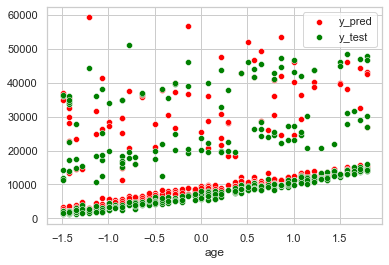

#################  rand_forest_reg_single
['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northeast', 'region_southeast', 'smoker*bmi']
(402,)


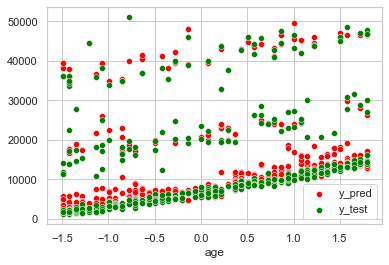

#################  grad_boost_reg_single
['age', 'bmi', 'children', 'smoker_yes', 'smoker*bmi']
(402,)


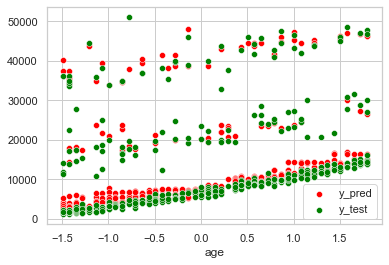

#################  neural_net_single
['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northeast', 'region_southeast', 'region_southwest', 'smoker*bmi']
(402,)


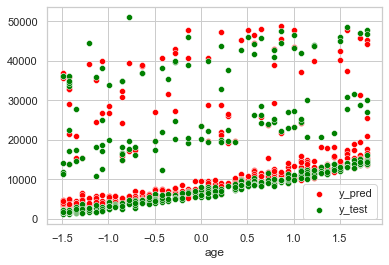

In [294]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Evaluate classification on test data
prediction_results = {}

for rm in single_regression_models:
    print("################# ",rm)
    # specify test data for regression
    X_test = data_test[reg_X[rm]]
    print(reg_X[rm])
    y_test = np.array(data_test[reg_y]).reshape(-1, 1).flatten()
#         print(X_test[0:10])
#         print(y_test[0:10])
    if rm == "neural_net_single":
        reg_model = neural_net_pure
    else:
        reg_model = pickle.load(open("models/"+rm+".sav", "rb"))

    # Predict with regression model
#         print(X_test.info())
    if rm == "neural_net_single":
        y_pred = nn_pure_y_scaler.inverse_transform(reg_model.predict(X_test).reshape(-1, 1))
        y_pred = y_pred.reshape(-1, )
    else:
        y_pred = reg_model.predict(X_test)
        y_pred = y_pred.reshape(-1, )


    print(y_pred.shape)

    sns.scatterplot(x = data_test["age"], y=y_pred, label="y_pred", color="red")
    sns.scatterplot(x = data_test["age"], y=y_test, label="y_test", color="green")

    plt.show()

    # Calculate regression metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    scores = {
        "rmse": rmse,
        "mae": mae,
        "r2": r2            
    }
    
    # add to dict
    prediction_results.update({str(rm): scores})

4775.81 (4938.27),4611.33 (4752.36),4433.55 (4603.21),4600.37 (4796.79)


2820.95,2547.95,2438.08,2727.66


0.84,0.85,0.86,0.85


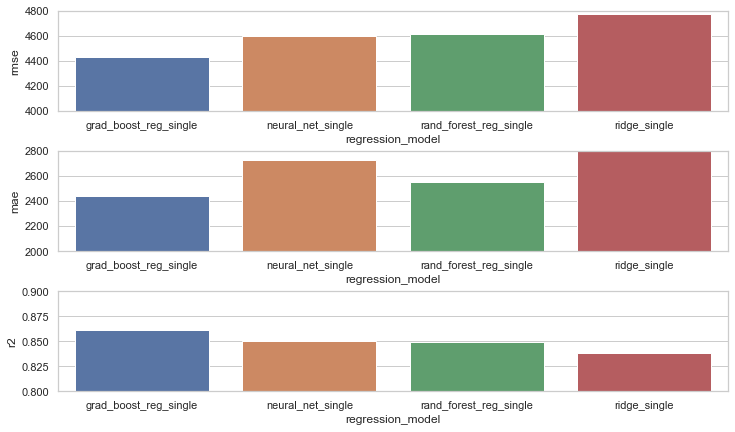

In [295]:
from IPython.display import HTML, display
import tabulate

def display_table(data):
    html = "<h3>Performance of the Single Models (Only Regression)</h3>"
    html += "<h4>Root Mean Squared Error of Prediction (Training RMSE)</h4><table>"
    for r in single_training_results:
        html += "<th><u>"+str(r)+"</u></th>"
    html += "</tr>"    
    
    html += "<tr>"
    for (rm) in data:
#         print(rm)
        html += "<td>{:.2f} ({:.2f})</td>".format(prediction_results[rm]["rmse"], single_training_results[rm])
    html += "</tr>"
    html += "</table>"
#     print(html)
    display(HTML(html))
    
display_table(prediction_results)

def display_table(data):
    html = "<h4>Mean Absolute Error</h4><table>"
    for r in single_training_results:
        html += "<th><u>"+str(r)+"</u></th>"
    html += "</tr>"    
    
    html += "<tr>"
    for (rm) in data:
#         print(rm)
        html += "<td>{:.2f}</td>".format(prediction_results[rm]["mae"])
    html += "</tr>"
    html += "</table>"
#     print(html)
    display(HTML(html))
    
display_table(prediction_results)

def display_table(data):
    html = "<h4>R-Squared Adjusted (out-of-sample)</h4><table>"
    for r in single_training_results:
        html += "<th><u>"+str(r)+"</u></th>"
    html += "</tr>"    
    
    html += "<tr>"
    for (rm) in data:
#         print(rm)
        html += "<td>{:.2f}</td>".format(prediction_results[rm]["r2"])
    html += "</tr>"
    html += "</table>"
#     print(html)
    display(HTML(html))
    
display_table(prediction_results)

# Barplots
single_results = pd.DataFrame(new_entry, columns=["regression_model", "rmse", "mae", "r2"])
for r in single_regression_models:
    rmse = prediction_results[r]["rmse"]
    mae = prediction_results[r]["mae"]
    r2 = prediction_results[r]["r2"]
    single_results = single_results.append({'regression_model':r, 'rmse':rmse, "mae":mae, "r2":r2}, ignore_index=True)
    
single_results = single_results.sort_values("rmse")
fig, ax = plt.subplots(3, 1, figsize=(12,7))
sns.barplot(x=single_results["regression_model"], y=single_results["rmse"], ax=ax[0])
ax[0].set(ylim=(4000, 4800))
sns.barplot(x=single_results["regression_model"], y=single_results["mae"], ax=ax[1])
ax[1].set(ylim=(2000, 2800))
sns.barplot(x=single_results["regression_model"], y=single_results["r2"], ax=ax[2])
ax[2].set(ylim=(0.8, 0.9))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)